# Bachelor-Notebook

### Data sources:
- [Games_of_all_time.csv](https://www.kaggle.com/datasets/xcherry/games-of-all-time-from-metacritic)
- [metacritic_games.csv](https://www.kaggle.com/datasets/skateddu/metacritic-all-time-games-stats)

*Muss noch gelöscht werden
- [Video_Games_Sales_as_at_22_Dec...](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings)




In [1]:
#Initialising the needed libaries
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 

Code der Stata in Phython "aktiviert" 
von: https://www.stata.com/python/pystata/install.html 

In [2]:
import sys
sys.path.append('C:/Program Files/Stata17/utilities')
from pystata import config
config.init('mp')


  ___  ____  ____  ____  ____ ©
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       MP—Parallel Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user 4-core network, expiring 29 Oct 2023
Serial number: 501709301768
  Licensed to: Uni Hamburg
               Universität Hamburg

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. More than 2 billion observations are allowed; see help obs_advice.
      3. Maximum number of variables is set to 5,000; see help set_maxvar.


# 1. Einlesen der Daten

In [3]:
#Erstellt einen DataFrame (Tabelle) anhand der csv-Datei
metacrit_data = pd.read_csv(r"data\games_of_all_time.csv")

In [4]:
#Erstellt einen DataFrame (Tabelle) anhand der csv-Datei
releasedata = pd.read_csv(r"data\metacritic_games.csv")

In [5]:
#Setting the option that all columns are shown.
#pd.set_option('display.max_columns', 100)

In [6]:
#Zeigt den DataFrame der games_of_all_time.csv Datei
#ACHTUNG!!!: Es wird empfohlen, die Darstellung des Dataframes auf html zu verändern. Dafür muss der Code in dieser Zeile ausgeführt werden, auf die drei Punkte links oben vom Output geklickt werden, dann "Change Presentation" ausgewählt werden und dann bei der sich öffnenden Option "text/html" ausgewählt werden. Dies ermöglicht eine einfachere Darstellungsweise der Daten.
metacrit_data

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",https://www.metacritic.com/game/nintendo-64/th...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,https://www.metacritic.com/game/wii/super-mari...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",https://www.metacritic.com/game/wii/super-mari...,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,https://www.metacritic.com/game/gamecube/metro...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,https://www.metacritic.com/game/switch/super-m...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+
...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",https://www.metacritic.com/game/xbox/killswitch,Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,https://www.metacritic.com/game/pc/naild,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,https://www.metacritic.com/game/xbox-one/ooo-a...,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",https://www.metacritic.com/game/wii/udraw-studio,THQ,"['Miscellaneous', 'General']",NaN,E


In [7]:
#Zeigt den DataFrame der metacritic_games.csv Datei
releasedata

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
0,Command & Conquer,PC,Westwood Studios,Virgin Interactive,Sci-Fi,1-4,T,NaN,"Aug 31, 1995",/game/pc/command-conquer,5,0,0,94,47,0,1,8.9
1,Full Throttle,PC,LucasArts,LucasArts,Adventure,NaN,NaN,NaN,"Apr 30, 1995",/game/pc/full-throttle,6,2,0,86,18,1,0,8.7
2,Battle Arena Toshinden,PS,Tamsoft,SCEA,Action,1-2,T,NaN,"Sep 9, 1995",/game/playstation/battle-arena-toshinden,1,3,0,69,1,0,1,5.8
3,Sid Meier's Civilization II,PC,MPS Labs,MicroProse,Strategy,1 Player,K-A,NaN,"Feb 29, 1996",/game/pc/sid-meiers-civilization-ii,7,0,0,94,46,0,1,8.9
4,Quake,PC,id Software,id Software,Action,1-16,M,NaN,"Jun 22, 1996",/game/pc/quake,9,0,0,94,84,4,1,8.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20417,ARK: Survival Evolved,Switch,Studio Wildcard,Studio Wildcard,Action Adventure,Online Multiplayer,T,NaN,"Nov 30, 2018",/game/switch/ark-survival-evolved,0,1,11,29,4,0,5,2.4
20418,Wild West Online,PC,NaN,NaN,Role-Playing,Online Multiplayer,NaN,NaN,"May 10, 2018",/game/pc/wild-west-online,0,0,8,29,0,0,9,0.4
20419,The Quiet Man,PS4,"Square Enix, Human Head Studios",Square Enix,Action Adventure,No Online Multiplayer,M,NaN,"Nov 1, 2018",/game/playstation-4/the-quiet-man,1,0,20,28,5,0,19,2.1
20420,Awkward,Switch,Snap Finger Click Ltd,Snap Finger Click Ltd,Miscellaneous,No Online Multiplayer,M,NaN,"Jul 5, 2018",/game/switch/awkward,0,0,4,28,0,0,2,tbd


# 2. Hauptdatensatz:

### 2.1. Erstellung des Datensatzes:

In [8]:
#Anpassung der "URL" Spalte an die "Link" Spalte des release_data - Datensatzes um ein zusammenfügen anhand der einzigartigen Internet-Adresse zu ermöglichen.
metacrit_data.url = metacrit_data.url.str.replace("https://www.metacritic.com/", "/")
#metacrit_data

C:\Users\Marek\AppData\Local\Temp/ipykernel_31896/1848361479.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  metacrit_data.url = metacrit_data.url.str.replace("https://www.metacritic.com/", "/")


In [9]:
#Erstellung eines neuen Datensatzes mit den Spalten des releasedata-Datensatzes, welche mit dem Main-Datensatzes gemerged werden sollen
releasedata_mergeprep= releasedata[["publisher", "release_date", "link"] ].copy()
#releasedata_mergeprep

In [10]:
#Merge die Ausgewählten Spalten des releasedata-Datensatzes mit dem Main-Datensatz anhand der "URL" und "LINK" Spalte. Fehlende Werte werden als 0 eingetragen.
metacrit_data = pd.merge(metacrit_data, releasedata_mergeprep, left_on=["url"], right_on=["link"], how="left").fillna(0)
#metacrit_data

In [11]:
#Entfernt die link- und url-Spalte aus dem Datensatz, da diese nicht mehr benötigt werden
metacrit_data.drop(columns=["link"], inplace=True)
metacrit_data.drop(columns=["url"], inplace=True)

### 2.2. Anpassungen

##### 2.2.1. Genre Aufsplittung

In [12]:
#Gibt an wie Häufig maximal ein "," in der Spalte "genre" vorkommt. Davon lässt sich ableiten, wie viele unterschiedliche Genres maximal in einer bestimmten Zelle stehen. (In diesem Falle sind es 10)
metacrit_data["genre"].str.count(",").max()

9.0

In [13]:
#Aufsplittung der Genre Spalte in einzelne Spalten für einfachere Übersicht. Da zuvor herausgefunden wurde, dass 10 die maximale Genre Anzahl ist, werden 10 Spalten genutzt. (Ebenfalls mit 9 und 11 Spalten getestet. Fehlercode: "Columns must be same length as key". 10 als maximale Genre Anzahl bestätigt )
metacrit_data[["genre1","genre2","genre3","genre4","genre5","genre6","genre7","genre8","genre9", "genre10"]] = metacrit_data["genre"].str.split(",", expand=True) 
metacrit_data

,game_name,meta_score,user_score,platform,description,developer,genre,type,rating,publisher,...,genre1,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E,Nintendo,...,['Action Adventure','Fantasy'],None,None,None,None,None,None,None,None
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E,Nintendo,...,['Action','Platformer','3D'],None,None,None,None,None,None,None
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E,Nintendo,...,['Action','Platformer','3D'],None,None,None,None,None,None,None
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T,Nintendo,...,['Action','Shooter','First-Person','Sci-Fi'],None,None,None,None,None,None
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+,Nintendo,...,['Action','Platformer','3D'],None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T,Namco,...,['Action','Shooter','Third-Person','Modern'],None,None,None,None,None,None
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+,Deep Silver,...,['Driving','Racing','Arcade','Automobile'],None,None,None,None,None,None
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E,Extra Mile Studios,...,['Action','General','Arcade'],None,None,None,None,None,None,None
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",THQ,"['Miscellaneous', 'General']",0,E,THQ,...,['Miscellaneous','General'],None,None,None,None,None,None,None,None


In [14]:
#Löscht ungewünschte Zeichen aus den entsprechenden genre Spalten
x=1
chars="[],' "
while x<11:
    for c in chars:
        metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].str.replace(c, "")
    x=x+1

C:\Users\Marek\AppData\Local\Temp/ipykernel_31896/2132432586.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].str.replace(c, "")


In [15]:
#Setzt alle Einträge in den "genre"-Spalten als String-Wert. Auch die 0, da diese sonst als fehlender Wert definiert ist, was teilweise analysen nicht möglich macht.
#x=1
#while x<11:
   # metacrit_data[("genre"+str(x))].astype(str)
    #x=x+1
#metacrit_data["genre4"].notnull()

##### 2.2.2. Niche Width-Spalte:

In [16]:
# Setze die 0 in den genre Spalten als Fehlenden Wert
#x=1
#while x<11:
    #print(("genre"+str(x))+ " vorher: " + str(metacrit_data[("genre"+str(x))].count()))
   # metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].replace(0, np.nan)
    #print(("genre"+str(x))+ " nachher: " + str(metacrit_data[("genre"+str(x))].count()))
    #x=x+1

In [17]:
#Erstellt neue Spalte mit dem Namen "niche_width". Setzt alle Einträge gleich 0
metacrit_data["niche_width"]=0
metacrit_data

,game_name,meta_score,user_score,platform,description,developer,genre,type,rating,publisher,...,genre2,genre3,genre4,genre5,genre6,genre7,genre8,genre9,genre10,niche_width
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E,Nintendo,...,Fantasy,None,None,None,None,None,None,None,None,0
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E,Nintendo,...,Platformer,3D,None,None,None,None,None,None,None,0
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E,Nintendo,...,Platformer,3D,None,None,None,None,None,None,None,0
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T,Nintendo,...,Shooter,First-Person,Sci-Fi,None,None,None,None,None,None,0
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+,Nintendo,...,Platformer,3D,None,None,None,None,None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T,Namco,...,Shooter,Third-Person,Modern,None,None,None,None,None,None,0
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+,Deep Silver,...,Racing,Arcade,Automobile,None,None,None,None,None,None,0
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E,Extra Mile Studios,...,General,Arcade,None,None,None,None,None,None,None,0
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",THQ,"['Miscellaneous', 'General']",0,E,THQ,...,General,None,None,None,None,None,None,None,None,0


In [18]:
#Passt die Spalte "niche_width" mit der entsprechenden Anzahl an Genres die ein einzelnes Spiel aufweist an.
x=1
while x<11:
    metacrit_data.loc[(metacrit_data[("genre"+str(x))].notnull()), "niche_width"]=x #Überprüft jede "genre1-10" Spalte, ob ein Wert eingetragen ist. Solange ein Wert (ein String) erkannt wird erhöht sich x um eins. Sobald kein Wert erkannt wird, wird x als niche_width Wert eingesetzt. 
    x=x+1
    print(metacrit_data["niche_width"].value_counts())

1    8827
0       4
Name: niche_width, dtype: int64
2    8826
0       4
1       1
Name: niche_width, dtype: int64
3    6441
2    2385
0       4
1       1
Name: niche_width, dtype: int64
4    3579
3    2862
2    2385
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1606
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1267
6     339
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1267
6     243
7      96
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1267
6     243
7      74
8      22
0       4
1       1
Name: niche_width, dtype: int64
3    2862
2    2385
4    1973
5    1267
6     243
7      74
8      19
0       4
9       3
1       1
Name: niche_width, dtype: int64
3     2862
2     2385
4     1973
5     1267
6      243
7       74
8       19
0        4
9        2
1        1
10       1
Name: niche_width, dtype: int64


In [64]:
#metacrit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8831 entries, 0 to 8830
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_name       8831 non-null   object 
 1   meta_score      8831 non-null   float64
 2   user_score      8831 non-null   float64
 3   platform        8831 non-null   object 
 4   developer       8831 non-null   object 
 5   genre           8831 non-null   object 
 6   publisher       7498 non-null   object 
 7   release_date    7500 non-null   object 
 8   genre1          8827 non-null   object 
 9   genre2          8826 non-null   object 
 10  genre3          6441 non-null   object 
 11  genre4          3579 non-null   object 
 12  genre5          1606 non-null   object 
 13  genre6          339 non-null    object 
 14  genre7          96 non-null     object 
 15  genre8          22 non-null     object 
 16  genre9          3 non-null      object 
 17  genre10         1 non-null      o

In [20]:
#print(metacrit_data["niche_width"].value_counts())

##### 2.2.3. Platform Width-Spalte:

In [21]:
#Gibt an wie Häufig maximal ein "," in der Spalte "platform" vorkommt. Davon lässt sich ableiten, wie viele unterschiedliche Platformen maximal in einer bestimmten Zelle stehen. (In diesem Falle 9)
metacrit_data["platform"].str.count(",").max()

8

In [22]:
#Aufsplittung der platform Spalte in einzelne Spalten für Rechnung:
metacrit_data[["platform1","platform2","platform3","platform4","platform5","platform6","platform7","platform8","platform9"]] = metacrit_data["platform"].str.split(",", expand=True) 
#metacrit_data

In [23]:
#Erstellt neue Spalte mit dem Namen "platform_width"
metacrit_data["platform_width"]=0
#metacrit_data

In [24]:
# Passt die Spalte "platform_width" mit der entsprechenden Anzahl an Platformen die ein einzelnes Spiel aufweist an
x=1
while x<10:
    metacrit_data.loc[(metacrit_data[("platform"+str(x))].notnull()), "platform_width"]=x
    x=x+1
    print(metacrit_data["platform_width"].value_counts())

1    8831
Name: platform_width, dtype: int64
1    6581
2    2250
Name: platform_width, dtype: int64
1    6581
2    1538
3     712
Name: platform_width, dtype: int64
1    6581
2    1538
3     528
4     184
Name: platform_width, dtype: int64
1    6581
2    1538
3     528
4     137
5      47
Name: platform_width, dtype: int64
1    6581
2    1538
3     528
4     137
5      38
6       9
Name: platform_width, dtype: int64
1    6581
2    1538
3     528
4     137
5      38
6       6
7       3
Name: platform_width, dtype: int64
1    6581
2    1538
3     528
4     137
5      38
6       6
7       2
8       1
Name: platform_width, dtype: int64
1    6581
2    1538
3     528
4     137
5      38
6       6
7       2
9       1
Name: platform_width, dtype: int64


In [25]:
#Löscht die einzelnen Platform Spalten, da diese nicht mehr benötigt werden und den Datensatz unübersichtlicher machen
x=1
while x<10:
    metacrit_data.drop(columns=[("platform"+str(x))], inplace=True)
    x=x+1
#metacrit_data

In [26]:
# Setze die 0 in den platform Spalten als Fehlenden Wert
#x=1
#while x<10:
  #  print(("platform"+str(x))+ " vorher: " + str(metacrit_data[("platform"+str(x))].count()))
   # metacrit_data[("platform"+str(x))]=metacrit_data[("platform"+str(x))].replace(0, np.nan)
   # print(("platform"+str(x))+ " nachher: " + str(metacrit_data[("platform"+str(x))].count()))
  #  x=x+1


In [27]:
#print(metacrit_data["platform_width"].value_counts())

##### 2.2.4. Veröffentlichungsjahr-Spalte

In [28]:
# Trennt die "release_date" Spalte in eine Datums und Jahres Spalte auf.
metacrit_data[["date","year"]] = metacrit_data["release_date"].str.split(",", expand=True) 

In [29]:
#Löscht die Datums Spalte, da nur das Jahr benötigt wird
metacrit_data.drop(columns=["date"], inplace=True)

In [30]:
metacrit_data["year"].dtypes

dtype('O')

In [31]:
#Ändert den Datentyp der Jahres Spalte von "object" in "float64", damit rechnungen möglich werden. 
metacrit_data["year"]= pd.to_numeric(metacrit_data["year"])
metacrit_data["year"].dtypes

dtype('float64')

##### 2.2.5. Fehlende Werte:

In [32]:
# Gibt einen Überblick über die fehlenden Werte (bzw. die nicht fehlenden Werte: non-null)
metacrit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8831 entries, 0 to 8830
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_name       8831 non-null   object 
 1   meta_score      8831 non-null   float64
 2   user_score      8831 non-null   float64
 3   platform        8831 non-null   object 
 4   description     8831 non-null   object 
 5   developer       8831 non-null   object 
 6   genre           8831 non-null   object 
 7   type            8831 non-null   object 
 8   rating          8831 non-null   object 
 9   publisher       8831 non-null   object 
 10  release_date    8831 non-null   object 
 11  genre1          8827 non-null   object 
 12  genre2          8826 non-null   object 
 13  genre3          6441 non-null   object 
 14  genre4          3579 non-null   object 
 15  genre5          1606 non-null   object 
 16  genre6          339 non-null    object 
 17  genre7          96 non-null     o

In [33]:
#Zeigt das es 4 Fälle mit 0 Genres gibt.  
metacrit_data["niche_width"].value_counts()
#0 wird in der niche_width Spalte als fehlender Wert gesetzt:
metacrit_data["niche_width"]=metacrit_data["niche_width"].replace(0, np.nan)

In [34]:
#Jedes Spiel ist minimal auf einer Platform verfügbar. (Keine Fehlenden Werte)
metacrit_data["platform_width"].value_counts()

1    6581
2    1538
3     528
4     137
5      38
6       6
7       2
9       1
Name: platform_width, dtype: int64

In [35]:
#Jedes Spiel hat eine Jahreszahl zugewiesen bekommen. (Keine Fehlenden Werte bzw. fehlende Werte wurden bereits definiert)
metacrit_data["year"].value_counts()

2018.0    498
2017.0    473
2016.0    458
2009.0    454
2008.0    438
2007.0    420
2015.0    419
2006.0    406
2011.0    401
2010.0    381
2002.0    381
2005.0    375
2012.0    374
2003.0    371
2014.0    365
2013.0    355
2004.0    345
2001.0    283
2000.0    200
1998.0     33
1999.0     33
1997.0     20
1996.0     16
1995.0      1
Name: year, dtype: int64

In [36]:
#Gibt die Summe der fehlenden Werte für die year-Spalte an
sum(metacrit_data["year"].isnull())

1331

In [37]:
#In der jeweiligen Spalte wird 0 als fehlender Wert gesetzt
metacrit_data["publisher"]=metacrit_data["publisher"].replace(0, np.nan)
#metacrit_data["players"]=metacrit_data["players"].replace(0, np.nan)
metacrit_data["release_date"]=metacrit_data["release_date"].replace(0, np.nan)
#metacrit_data["link"]=metacrit_data["link"].replace(0, np.nan)
#metacrit_data["critic_positive"]=metacrit_data["critic_positive"].replace(0, np.nan)
#metacrit_data["critic_neutral"]=metacrit_data["critic_neutral"].replace(0, np.nan)
#metacrit_data["critic_negative"]=metacrit_data["critic_negative"].replace(0, np.nan)
#metacrit_data["user_positive"]=metacrit_data["user_positive"].replace(0, np.nan)
#metacrit_data["user_neutral"]=metacrit_data["user_neutral"].replace(0, np.nan)
#metacrit_data["user_negative"]=metacrit_data["user_negative"].replace(0, np.nan)

In [38]:
metacrit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8831 entries, 0 to 8830
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_name       8831 non-null   object 
 1   meta_score      8831 non-null   float64
 2   user_score      8831 non-null   float64
 3   platform        8831 non-null   object 
 4   description     8831 non-null   object 
 5   developer       8831 non-null   object 
 6   genre           8831 non-null   object 
 7   type            8831 non-null   object 
 8   rating          8831 non-null   object 
 9   publisher       7498 non-null   object 
 10  release_date    7500 non-null   object 
 11  genre1          8827 non-null   object 
 12  genre2          8826 non-null   object 
 13  genre3          6441 non-null   object 
 14  genre4          3579 non-null   object 
 15  genre5          1606 non-null   object 
 16  genre6          339 non-null    object 
 17  genre7          96 non-null     o

In [39]:
#Maximalwert und Minimalwert liegen zwichen 0 und 100. Aufgrund von des float64-Spaltentypes können so fehlende Werte ausgeschlossen werden.
print(metacrit_data["meta_score"].max())
print(metacrit_data["meta_score"].min())

99.0
11.0


In [40]:
#Maximalwert und Minimalwert liegen zwichen 0 und 100. Aufgrund von des float64-Spaltentypes können so fehlende Werte ausgeschlossen werden. 
print(metacrit_data["user_score"].max())
print(metacrit_data["user_score"].min())

98.0
2.0


In [41]:
#Entfernt alle nicht weiter benötigten Spalten
metacrit_data.drop(columns=["description", "rating", "type"], inplace=True)


##### 2.2.6. überprüfung der Daten:

In [42]:
#Dies ist der genutze Code um den zufälligen Datensatz zu gorben überprüfung zu erstellen. Der Code wurde aus-kommentiert, da bei einer erneuten durchführung neue zufällige Fälle ausgewählt würden     
    #Zeigt Ausschnitt aus dem Datensatz an. 
    #metacrit_data_random=metacrit_data.sample(n=30)
    #Speichert den Dataframe als Excel Datei ab
    #metacrit_data_random.to_excel("data/Random_Data.xlsx")

In [43]:
#Liest den zufälligen Datensatz wieder als DataFrame ein, um ihn in zukunft anzeigen zu können.
metacrit_data_random = pd.read_excel(r"data\Random_Data.xlsx")
#metacrit_data_random

# 3. Beschreibung des Datensatzes: 


### 3.1. Umgang mit Platformen

In [44]:
#Gibt die maximal vorkommende Häufigkeit eines Namens an. (Einmal für den Hauptdatensatz und einem für den releasedata-Datensatz)
print(metacrit_data["game_name"].value_counts().max())
print(releasedata["name"].value_counts().max())

1
10


In [45]:
#Gibt eine bestimmte Reihe anhand des Index-Wertes wieder
metacrit_data.loc[4425]

game_name         Arcade Classics Anniversary Collection
meta_score                                          62.0
user_score                                          44.5
platform                     ['playstation-4', 'switch']
developer                                         Konami
genre                   ['Miscellaneous', 'Compilation']
publisher                                            NaN
release_date                                         NaN
genre1                                     Miscellaneous
genre2                                       Compilation
genre3                                              None
genre4                                              None
genre5                                              None
genre6                                              None
genre7                                              None
genre8                                              None
genre9                                              None
genre10                        

### 3.2. Wichtige Variablen

In [46]:
#Zeigt die Spaltentitel an
metacrit_data.columns

Index(['game_name', 'meta_score', 'user_score', 'platform', 'developer',
       'genre', 'publisher', 'release_date', 'genre1', 'genre2', 'genre3',
       'genre4', 'genre5', 'genre6', 'genre7', 'genre8', 'genre9', 'genre10',
       'niche_width', 'platform_width', 'year'],
      dtype='object')

##### 3.2.1. Metascore

In [47]:
#Gibt für die unterschiedlichen Spalten mit NUR Zahlenwerten, bestimmte statistische Werte wieder.
metacrit_data.describe()

,meta_score,user_score,niche_width,platform_width,year
count,8831.000000,8831.000000,8827.000000,8831.000000,7500.000000
mean,70.876621,69.903918,3.369208,1.363153,2009.493733
std,12.181944,13.161456,1.175403,0.722739,5.493037
min,11.000000,2.000000,1.000000,1.000000,1995.000000
25%,63.000000,63.000000,2.000000,1.000000,2005.000000
50%,73.000000,72.800000,3.000000,1.000000,2009.000000
75%,80.000000,79.000000,4.000000,2.000000,2014.000000
max,99.000000,98.000000,10.000000,9.000000,2018.000000


In [49]:
#Gibt an wie häufig ein einzigartiger Wert vorkommt. (Hieraus lässt sich der Modus ableiten)
metacrit_data["meta_score"].value_counts()

80.00    371
77.00    352
76.00    345
74.00    344
72.00    289
        ... 
96.80      1
76.75      1
44.50      1
50.50      1
46.67      1
Name: meta_score, Length: 297, dtype: int64

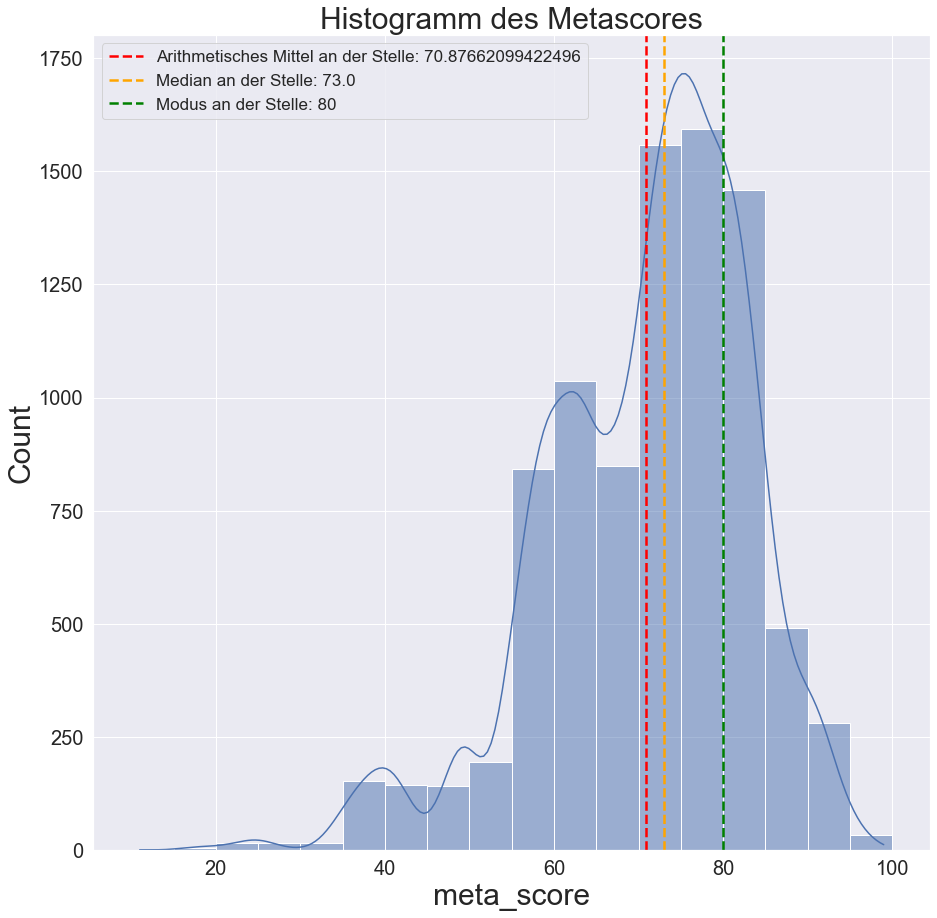

In [50]:
#Erstellt ein Histogram für die meta_score-Spalte
sns.set(rc = {'figure.figsize':(15,15)})                                                     #Setzt die Größe der Grafik fest
sns.histplot(metacrit_data.meta_score, binwidth=5, binrange=[10,100], kde=True)              #Erstellt Histogram mit einer Balkenbreite von 5 Skalenwerten und einer eingezeichneten Verteilungskurve
plt.xlabel("meta_score", size=30)                                                            #Passt den Titel der x-Achse an und dessen größe 
plt.ylabel("Count", size=30)                                                                 #Passt den Titel der y-Achse an und dessen größe 
plt.tick_params(axis='both', which='major', labelsize=20)                                    #Passt die größe der x und y Achse an
plt.axvline(x=metacrit_data["meta_score"].mean(),color='red',ls='--', lw=2.5, label=("Arithmetisches Mittel an der Stelle: "+str(metacrit_data["meta_score"].mean())))                #Erstellt eine Gerade an der Stelle des arithmetischen Mittels
plt.axvline(x=metacrit_data["meta_score"].median(),color='orange',ls='--', lw=2.5, label=("Median an der Stelle: "+str(metacrit_data["meta_score"].median())))                        #Erstellt eine Gerade an der Stelle des Medians
plt.axvline(x=80,color='green',ls='--', lw=2.5, label="Modus an der Stelle: 80")                                                                                                      #Erstellt eine Gerade an der Stelle des Modus (manuell eingegeben)
plt.legend(loc='upper left', prop={'size': 17})
plt.title("Histogramm des Metascores", size=30)                                              #Setzt den Titel der Grafik und dessen Größe fest
plt.savefig("Pictures/histogram_metascore.jpg")                                              #Speichert die Grafik in den Pictures-Ordner als .jpg Datei


In [51]:
#Gibt den Interquartils-Abstand der meta_score-Spalte wieder
stats.iqr(metacrit_data["meta_score"])

17.0

In [52]:
#Berechnung der Grenze des oberen und unteren Whiskers:
IQA=17
Q3=80
Q1=63
print("Obere Whisker Grenze: "+str(Q3+(IQA*1.5)))
print("Obere Whisker Grenze: "+str(Q1-(IQA*1.5)))
print("Unterer Grenzwert für Extremwerte: "+str(Q1-(IQA*3)))

Obere Whisker Grenze: 105.5
Obere Whisker Grenze: 37.5
Unterer Grenzwert für Extremwerte: 12


In [53]:
#Gibt die Anzahl an Reihen und damit die Anzahl an Fällen an, die unter den gesetzten Werten liegen
print(metacrit_data[(metacrit_data["meta_score"]<37.5)].shape)
print(metacrit_data[(metacrit_data["meta_score"]<12)].shape)

(130, 21)
(1, 21)


##### 3.2.2. Userscore

In [54]:
#Gibt für die unterschiedlichen Spalten mit NUR Zahlenwerten, bestimmte statistische Werte wieder.
metacrit_data.describe()

,meta_score,user_score,niche_width,platform_width,year
count,8831.000000,8831.000000,8827.000000,8831.000000,7500.000000
mean,70.876621,69.903918,3.369208,1.363153,2009.493733
std,12.181944,13.161456,1.175403,0.722739,5.493037
min,11.000000,2.000000,1.000000,1.000000,1995.000000
25%,63.000000,63.000000,2.000000,1.000000,2005.000000
50%,73.000000,72.800000,3.000000,1.000000,2009.000000
75%,80.000000,79.000000,4.000000,2.000000,2014.000000
max,99.000000,98.000000,10.000000,9.000000,2018.000000


In [56]:
#Gibt an wie häufig ein einzigartiger Wert vorkommt. (Hieraus lässt sich der Modus ableiten)
metacrit_data["user_score"].value_counts()

77.0    316
75.0    300
76.0    289
78.0    286
73.0    264
       ... 
76.2      1
81.2      1
81.4      1
79.2      1
38.3      1
Name: user_score, Length: 301, dtype: int64

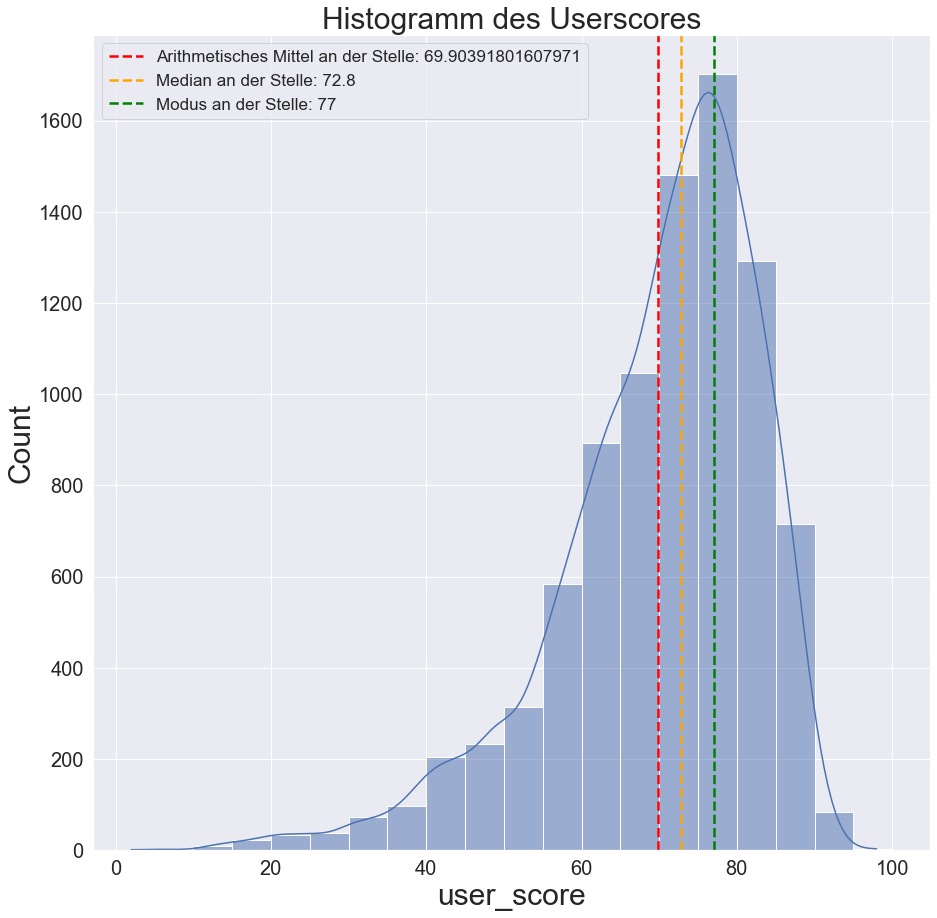

In [57]:
#Erstellt ein Histogram für die user_score-Spalte
sns.set(rc = {'figure.figsize':(15,15)})                                                     #Setzt die Größe der Grafik fest
sns.histplot(metacrit_data.user_score, binwidth=5, binrange=[10,100], kde=True)              #Erstellt Histogram mit einer Balkenbreite von 5 Skalenwerten und einer eingezeichneten Verteilungskurve
plt.xlabel("user_score", size=30)                                                            #Passt den Titel der x-Achse an und dessen größe 
plt.ylabel("Count", size=30)                                                                 #Passt den Titel der y-Achse an und dessen größe 
plt.tick_params(axis='both', which='major', labelsize=20)                                    #Passt die größe der x und y Achse an
plt.axvline(x=metacrit_data["user_score"].mean(),color='red',ls='--', lw=2.5, label=("Arithmetisches Mittel an der Stelle: "+str(metacrit_data["user_score"].mean())))                #Erstellt eine Gerade an der Stelle des arithmetischen Mittels
plt.axvline(x=metacrit_data["user_score"].median(),color='orange',ls='--', lw=2.5, label=("Median an der Stelle: "+str(metacrit_data["user_score"].median())))                        #Erstellt eine Gerade an der Stelle des Medians
plt.axvline(x=77,color='green',ls='--', lw=2.5, label="Modus an der Stelle: 77")                                                                                                      #Erstellt eine Gerade an der Stelle des Modus (manuell eingegeben)
plt.legend(loc='upper left', prop={'size': 17})
plt.title("Histogramm des Userscores", size=30)                                              #Setzt den Titel der Grafik und dessen Größe fest
plt.savefig("Pictures/histogram_userscore.jpg")                                              #Speichert die Grafik in den Pictures-Ordner als .jpg Datei


In [58]:
#Gibt den Interquartils-Abstand der user_score-Spalte wieder
stats.iqr(metacrit_data["user_score"])

16.0

In [59]:
#Berechnung der Grenze des oberen und unteren Whiskers:
IQA=16
Q3=79
Q1=63
print("Obere Whisker Grenze: "+str(Q3+(IQA*1.5)))
print("Untere Whisker Grenze: "+str(Q1-(IQA*1.5)))
print("Unterer Grenzwert für Extremwerte: "+str(Q1-(IQA*3)))

Obere Whisker Grenze: 103.0
Untere Whisker Grenze: 39.0
Unterer Grenzwert für Extremwerte: 15


In [60]:
#Gibt die Anzahl an Reihen und damit die Anzahl an Fällen an, die unter den gesetzten Werten liegen
print(metacrit_data[(metacrit_data["user_score"]<39)].shape)
print(metacrit_data[(metacrit_data["user_score"]<15)].shape)

(256, 21)
(13, 21)


##### 3.2.3. Erstellung eines gemeinsamen Boxplots

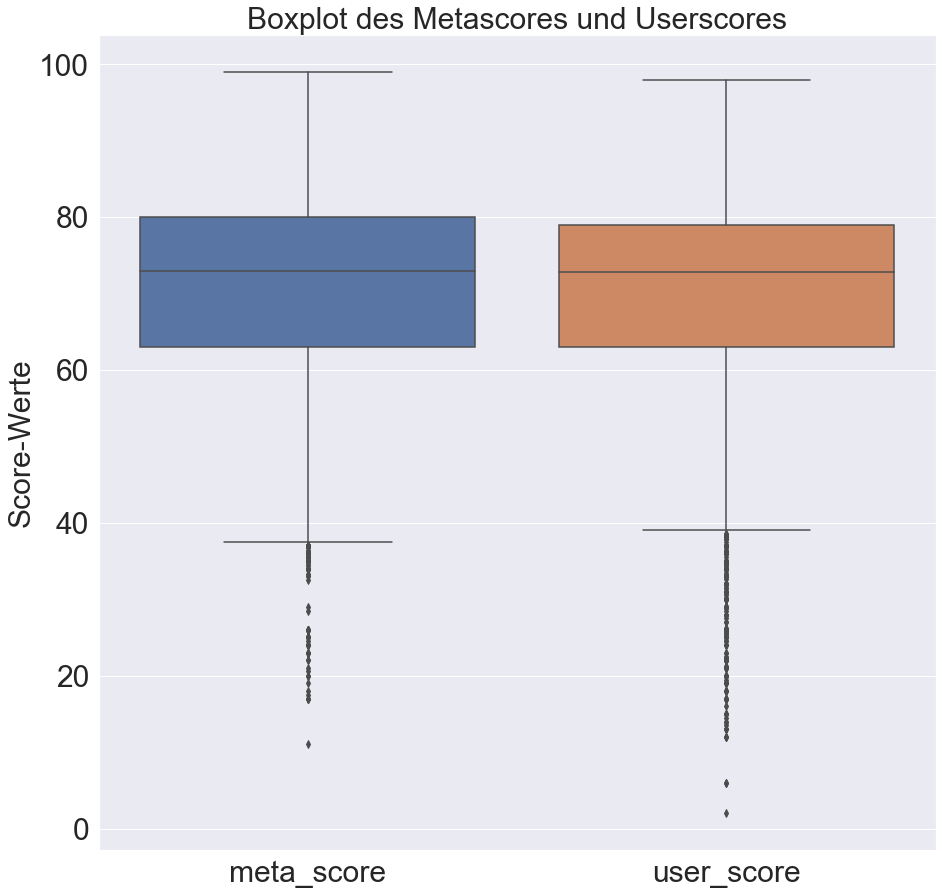

In [61]:
#Erstellt einen Boxplot für meta_score und user_score
sns.boxplot(data=metacrit_data[["meta_score", "user_score"]])                                                      
plt.ylabel("Score-Werte", size=30)                                                                 #Passt den Titel der y-Achse an und dessen größe 
plt.tick_params(axis='both', which='major', labelsize=30)                                    #Passt die größe der x und y Achse an
plt.title("Boxplot des Metascores und Userscores", size=30)                                  #Setzt den Titel der Grafik und dessen Größe fest
plt.savefig("Pictures/boxplot_metascore_and_userscore.jpg")                                  #Speichert die Grafik in den Pictures-Ordner als .jpg Datei


##### 3.2.4: Niche Width

In [ ]:
#Gibt für die unterschiedlichen Spalten mit NUR Zahlenwerten, bestimmte statistische Werte wieder.
metacrit_data.describe()

,meta_score,user_score,niche_width,platform_width,year
count,8831.000000,8831.000000,8827.000000,8831.000000,7500.000000
mean,70.876621,69.903918,3.369208,1.363153,2009.493733
std,12.181944,13.161456,1.175403,0.722739,5.493037
min,11.000000,2.000000,1.000000,1.000000,1995.000000
25%,63.000000,63.000000,2.000000,1.000000,2005.000000
50%,73.000000,72.800000,3.000000,1.000000,2009.000000
75%,80.000000,79.000000,4.000000,2.000000,2014.000000
max,99.000000,98.000000,10.000000,9.000000,2018.000000


In [72]:
#Gibt an wie häufig ein einzigartiger Wert vorkommt. (Hieraus lässt sich der Modus ableiten)
metacrit_data["niche_width"].value_counts()

3.0     2862
2.0     2385
4.0     1973
5.0     1267
6.0      243
7.0       74
8.0       19
9.0        2
1.0        1
10.0       1
Name: niche_width, dtype: int64

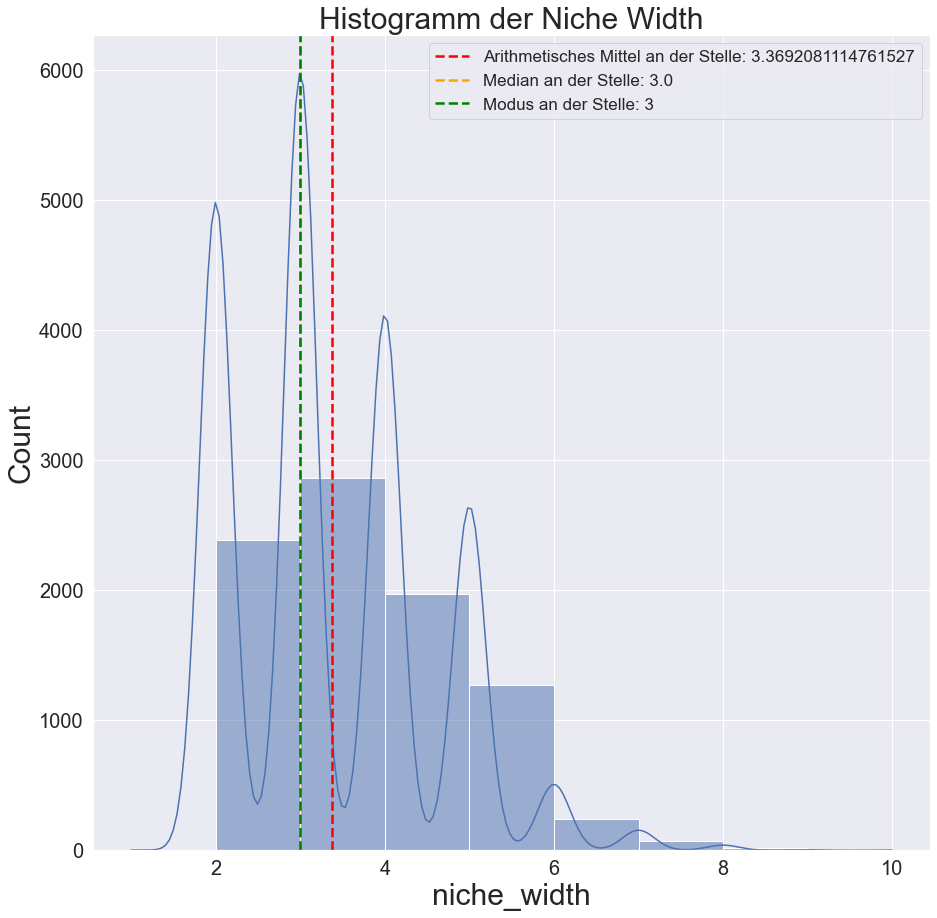

In [76]:
#Erstellt ein Histogram für die niche_width-Spalte
#sns.set(rc = {'figure.figsize':(15,15)})                                                     #Setzt die Größe der Grafik fest
#sns.histplot(metacrit_data.niche_width, binwidth=1, kde=True)              #Erstellt Histogram mit einer Balkenbreite von 1 Skalenwerten und einer eingezeichneten Verteilungskurve
#plt.xlabel("niche_width", size=30)                                                            #Passt den Titel der x-Achse an und dessen größe 
#plt.ylabel("Count", size=30)                                                                 #Passt den Titel der y-Achse an und dessen größe 
#plt.tick_params(axis='both', which='major', labelsize=20)                                    #Passt die größe der x und y Achse an
#plt.axvline(x=metacrit_data["niche_width"].mean(),color='red',ls='--', lw=2.5, label=("Arithmetisches Mittel an der Stelle: "+str(metacrit_data["niche_width"].mean())))                #Erstellt eine Gerade an der Stelle des arithmetischen Mittels
#plt.axvline(x=metacrit_data["niche_width"].median(),color='orange',ls='--', lw=2.5, label=("Median an der Stelle: "+str(metacrit_data["niche_width"].median())))                        #Erstellt eine Gerade an der Stelle des Medians
#plt.axvline(x=3,color='green',ls='--', lw=2.5, label="Modus an der Stelle: 3")                                                                                                      #Erstellt eine Gerade an der Stelle des Modus (manuell eingegeben)
#plt.legend(loc='upper right', prop={'size': 17})
#plt.title("Histogramm der Niche Width", size=30)                                              #Setzt den Titel der Grafik und dessen Größe fest
#plt.savefig("Pictures/histogram_niche_width.jpg")                                              #Speichert die Grafik in den Pictures-Ordner als .jpg Datei


In [79]:
#Fehlende Werte werden 0 gesetzt um rechnung zu ermöglichen
metacrit_data["niche_width"]=metacrit_data["niche_width"].replace(np.nan,0)

In [80]:
#Gibt den Interquartils-Abstand der user_score-Spalte wieder
stats.iqr(metacrit_data["niche_width"])

2.0

In [81]:
#0 wird wieder als fehlender Wert gesetzt
metacrit_data["niche_width"]=metacrit_data["niche_width"].replace(0,np.nan)

In [84]:
#Berechnung der Grenze des oberen und unteren Whiskers:
IQA=2
Q3=4
Q1=2
print("Obere Whisker Grenze: "+str(Q3+(IQA*1.5)))
print("Untere Whisker Grenze: "+str(Q1-(IQA*1.5)))
print("Oberer Grenzwert für Extremwerte: "+str(Q3+(IQA*3)))
print("Unterer Grenzwert für Extremwerte: "+str(Q1-(IQA*3)))

Obere Whisker Grenze: 7.0
Untere Whisker Grenze: -1.0
Oberer Grenzwert für Extremwerte: 10
Unterer Grenzwert für Extremwerte: -4


In [86]:
#Gibt die Anzahl an Reihen und damit die Anzahl an Fällen an, die unter den gesetzten Werten liegen
print("Zeigt die Anzahl an oberen Ausreißern an: " +str(metacrit_data[(metacrit_data["niche_width"]>7)].shape))
print("Zeigt die Anzahl an oberen Extremwerten an " +str(metacrit_data[(metacrit_data["niche_width"]>10)].shape))

Zeigt die Anzahl an oberen Ausreißern an: (22, 21)
Zeigt die Anzahl an oberen Extremwerten an (0, 21)


##### 3.2.5. Platform Width

In [ ]:
#Gibt für die unterschiedlichen Spalten mit NUR Zahlenwerten, bestimmte statistische Werte wieder.
metacrit_data.describe()

,meta_score,user_score,niche_width,platform_width,year
count,8831.000000,8831.000000,8827.000000,8831.000000,7500.000000
mean,70.876621,69.903918,3.369208,1.363153,2009.493733
std,12.181944,13.161456,1.175403,0.722739,5.493037
min,11.000000,2.000000,1.000000,1.000000,1995.000000
25%,63.000000,63.000000,2.000000,1.000000,2005.000000
50%,73.000000,72.800000,3.000000,1.000000,2009.000000
75%,80.000000,79.000000,4.000000,2.000000,2014.000000
max,99.000000,98.000000,10.000000,9.000000,2018.000000


In [93]:
#Gibt an wie häufig ein einzigartiger Wert vorkommt. (Hieraus lässt sich der Modus ableiten)
metacrit_data["platform_width"].value_counts()

1    6581
2    1538
3     528
4     137
5      38
6       6
7       2
9       1
Name: platform_width, dtype: int64

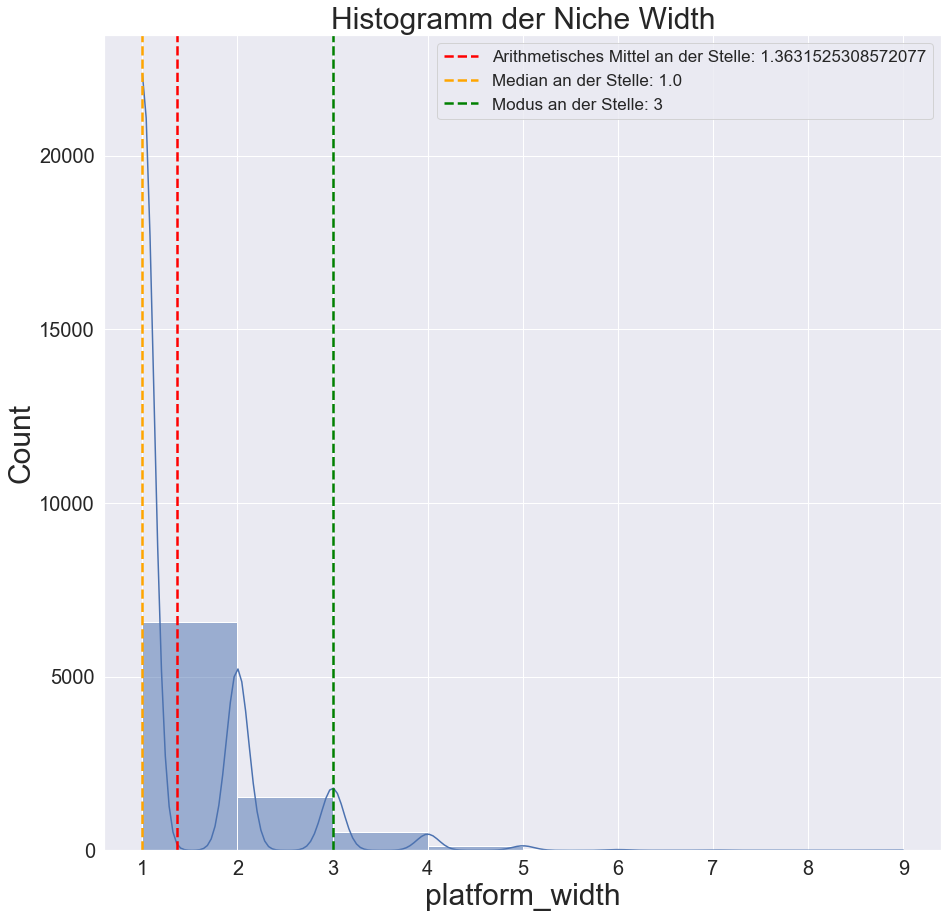

In [88]:
#Erstellt ein Histogram für die platform_width-Spalte
#sns.set(rc = {'figure.figsize':(15,15)})                                                     #Setzt die Größe der Grafik fest
#sns.histplot(metacrit_data.platform_width, binwidth=1, kde=True)              #Erstellt Histogram mit einer Balkenbreite von 1 Skalenwerten und einer eingezeichneten Verteilungskurve
#plt.xlabel("platform_width", size=30)                                                            #Passt den Titel der x-Achse an und dessen größe 
#plt.ylabel("Count", size=30)                                                                 #Passt den Titel der y-Achse an und dessen größe 
#plt.tick_params(axis='both', which='major', labelsize=20)                                    #Passt die größe der x und y Achse an
#plt.axvline(x=metacrit_data["platform_width"].mean(),color='red',ls='--', lw=2.5, label=("Arithmetisches Mittel an der Stelle: "+str(metacrit_data["platform_width"].mean())))                #Erstellt eine Gerade an der Stelle des arithmetischen Mittels
#plt.axvline(x=metacrit_data["platform_width"].median(),color='orange',ls='--', lw=2.5, label=("Median an der Stelle: "+str(metacrit_data["platform_width"].median())))                        #Erstellt eine Gerade an der Stelle des Medians
#plt.axvline(x=3,color='green',ls='--', lw=2.5, label="Modus an der Stelle: 3")                                                                                                      #Erstellt eine Gerade an der Stelle des Modus (manuell eingegeben)
#plt.legend(loc='upper right', prop={'size': 17})
#plt.title("Histogramm der platform_width", size=30)                                              #Setzt den Titel der Grafik und dessen Größe fest
#plt.savefig("Pictures/histogram_platform_width.jpg")                                              #Speichert die Grafik in den Pictures-Ordner als .jpg Datei


In [89]:
#Gibt den Interquartils-Abstand der user_score-Spalte wieder
stats.iqr(metacrit_data["platform_width"])

1.0

In [95]:
#Berechnung der Grenze des oberen und unteren Whiskers:
IQA=1
Q3=2
Q1=1
print("Obere Whisker Grenze: "+str(Q3+(IQA*1.5)))
print("Untere Whisker Grenze: "+str(Q1-(IQA*1.5)))
print("Oberer Grenzwert für Extremwerte: "+str(Q3+(IQA*3)))
print("Unterer Grenzwert für Extremwerte: "+str(Q1-(IQA*3)))

Obere Whisker Grenze: 3.5
Untere Whisker Grenze: -0.5
Oberer Grenzwert für Extremwerte: 5
Unterer Grenzwert für Extremwerte: -2


In [94]:
#Gibt die Anzahl an Reihen und damit die Anzahl an Fällen an, die unter den gesetzten Werten liegen
print("Zeigt die Anzahl an oberen Ausreißern an: " +str(metacrit_data[(metacrit_data["platform_width"]>3.5)].shape))
print("Zeigt die Anzahl an oberen Extremwerten an " +str(metacrit_data[(metacrit_data["platform_width"]>5)].shape))

Zeigt die Anzahl an oberen Ausreißern an: (184, 21)
Zeigt die Anzahl an oberen Extremwerten an (9, 21)


##### 3.2.6. Erscheinungsjahr

In [118]:
#Gibt für die unterschiedlichen Spalten mit NUR Zahlenwerten, bestimmte statistische Werte wieder.
metacrit_data.describe()

,meta_score,user_score,niche_width,platform_width,year
count,8831.000000,8831.000000,8827.000000,8831.000000,7500.000000
mean,70.876621,69.903918,3.369208,1.363153,2009.493733
std,12.181944,13.161456,1.175403,0.722739,5.493037
min,11.000000,2.000000,1.000000,1.000000,1995.000000
25%,63.000000,63.000000,2.000000,1.000000,2005.000000
50%,73.000000,72.800000,3.000000,1.000000,2009.000000
75%,80.000000,79.000000,4.000000,2.000000,2014.000000
max,99.000000,98.000000,10.000000,9.000000,2018.000000


In [96]:
#Gibt an wie häufig ein einzigartiger Wert vorkommt. (Hieraus lässt sich der Modus ableiten)
metacrit_data["year"].value_counts()

2018.0    498
2017.0    473
2016.0    458
2009.0    454
2008.0    438
2007.0    420
2015.0    419
2006.0    406
2011.0    401
2010.0    381
2002.0    381
2005.0    375
2012.0    374
2003.0    371
2014.0    365
2013.0    355
2004.0    345
2001.0    283
2000.0    200
1998.0     33
1999.0     33
1997.0     20
1996.0     16
1995.0      1
Name: year, dtype: int64

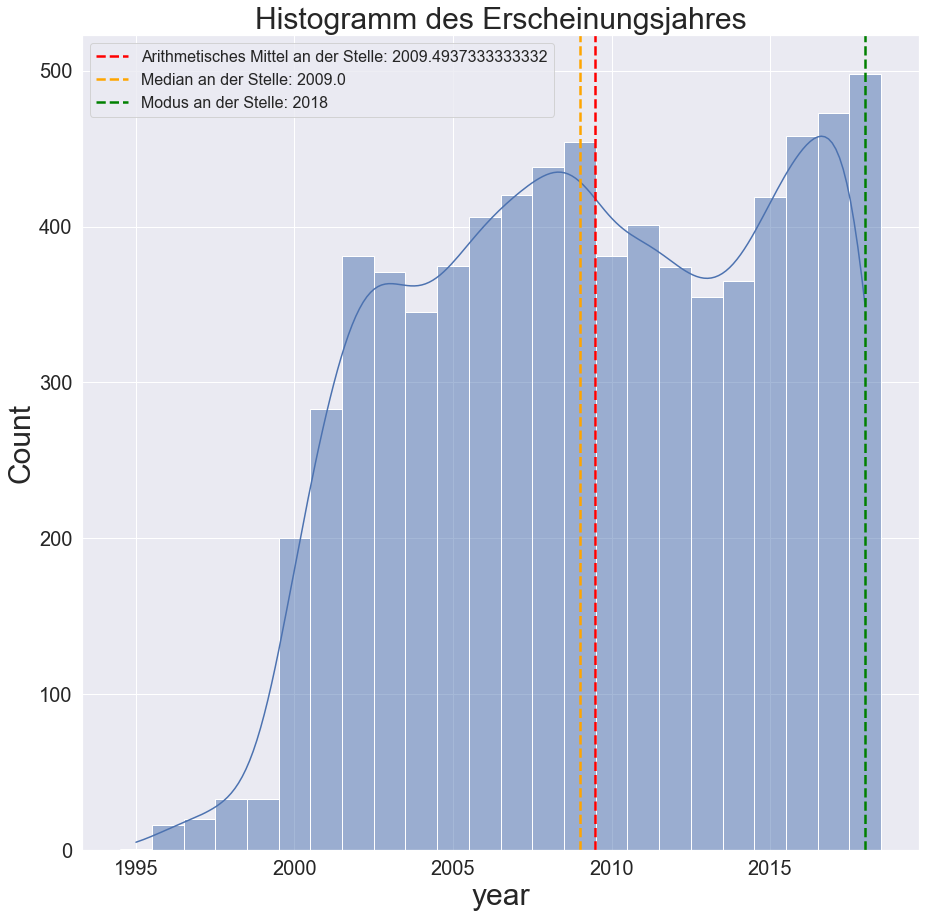

In [103]:
#Erstellt ein Histogram für die year-Spalte
sns.set(rc = {'figure.figsize':(15,15)})                                                     #Setzt die Größe der Grafik fest
sns.histplot(metacrit_data.year, discrete=True, kde=True)              #Erstellt Histogram mit einer Balkenbreite von 1 Skalenwerten und einer eingezeichneten Verteilungskurve
plt.xlabel("year", size=30)                                                            #Passt den Titel der x-Achse an und dessen größe 
plt.ylabel("Count", size=30)                                                                 #Passt den Titel der y-Achse an und dessen größe 
plt.tick_params(axis='both', which='major', labelsize=20)                                    #Passt die größe der x und y Achse an
plt.axvline(x=metacrit_data["year"].mean(),color='red',ls='--', lw=2.5, label=("Arithmetisches Mittel an der Stelle: "+str(metacrit_data["year"].mean())))                #Erstellt eine Gerade an der Stelle des arithmetischen Mittels
plt.axvline(x=metacrit_data["year"].median(),color='orange',ls='--', lw=2.5, label=("Median an der Stelle: "+str(metacrit_data["year"].median())))                        #Erstellt eine Gerade an der Stelle des Medians
plt.axvline(x=2018,color='green',ls='--', lw=2.5, label="Modus an der Stelle: 2018")                                                                                                      #Erstellt eine Gerade an der Stelle des Modus (manuell eingegeben)
plt.legend(loc='upper left', prop={'size': 16})
plt.title("Histogramm des Erscheinungsjahres", size=30)                                              #Setzt den Titel der Grafik und dessen Größe fest
plt.savefig("Pictures/histogram_year.jpg")                                              #Speichert die Grafik in den Pictures-Ordner als .jpg Datei


In [120]:
#Fehlende Werte werden 0 gesetzt um rechnung zu ermöglichen
metacrit_data.describe()

,meta_score,user_score,niche_width,platform_width,year
count,8831.000000,8831.000000,8827.000000,8831.000000,7500.000000
mean,70.876621,69.903918,3.369208,1.363153,2009.493733
std,12.181944,13.161456,1.175403,0.722739,5.493037
min,11.000000,2.000000,1.000000,1.000000,1995.000000
25%,63.000000,63.000000,2.000000,1.000000,2005.000000
50%,73.000000,72.800000,3.000000,1.000000,2009.000000
75%,80.000000,79.000000,4.000000,2.000000,2014.000000
max,99.000000,98.000000,10.000000,9.000000,2018.000000


In [121]:
#Gibt den Interquartils-Abstand der year-Spalte wieder
print(2014-2005)

9


In [117]:
#0 wird wieder als fehlender Wert gesetzt
metacrit_data["year"]=metacrit_data["year"].replace(0,np.nan)

In [122]:
#Berechnung der Grenze des oberen und unteren Whiskers:
IQA=9
Q3=2014
Q1=2005
print("Obere Whisker Grenze: "+str(Q3+(IQA*1.5)))
print("Untere Whisker Grenze: "+str(Q1-(IQA*1.5)))
print("Oberer Grenzwert für Extremwerte: "+str(Q3+(IQA*3)))
print("Unterer Grenzwert für Extremwerte: "+str(Q1-(IQA*3)))

Obere Whisker Grenze: 2027.5
Untere Whisker Grenze: 1991.5
Oberer Grenzwert für Extremwerte: 2041
Unterer Grenzwert für Extremwerte: 1978


##### 3.2.7. ...

In [123]:
metacrit_data.columns

Index(['game_name', 'meta_score', 'user_score', 'platform', 'developer',
       'genre', 'publisher', 'release_date', 'genre1', 'genre2', 'genre3',
       'genre4', 'genre5', 'genre6', 'genre7', 'genre8', 'genre9', 'genre10',
       'niche_width', 'platform_width', 'year'],
      dtype='object')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
#plt.figure(figsize=(6, 6), dpi = 600)

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

In [ ]:
#Gibt die Anzahl an Reihen und Spalten wieder. In diesem Fall entspricht die Reihenanzahl der Anzahl der Fälle
metacrit_data.shape

(8831, 24)

In [ ]:
#Gibt für Spalten mit float-type (also "Zahlenspalten") verschiedene statistische Zahlen wieder, wie z.B. das Arithmetische Mittel und die Standardabweichung.
metacrit_data.describe()

,meta_score,user_score,niche_width,platform_width,year
count,8831.000000,8831.000000,8827.000000,8831.000000,7500.000000
mean,70.876621,69.903918,3.369208,1.363153,2009.493733
std,12.181944,13.161456,1.175403,0.722739,5.493037
min,11.000000,2.000000,1.000000,1.000000,1995.000000
25%,63.000000,63.000000,2.000000,1.000000,2005.000000
50%,73.000000,72.800000,3.000000,1.000000,2009.000000
75%,80.000000,79.000000,4.000000,2.000000,2014.000000
max,99.000000,98.000000,10.000000,9.000000,2018.000000


In [ ]:
#Maximum von Spalten

In [ ]:
#Uniques Werte von Genre

In [ ]:
#Boxplots

In [ ]:
metacrit_data

,game_name,meta_score,user_score,platform,description,developer,genre,type,rating,publisher,...,genre4,genre5,genre6,genre7,genre8,genre9,genre10,niche_width,platform_width,year
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E,Nintendo,...,None,None,None,None,None,None,None,2.0,1,1998.0
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E,Nintendo,...,None,None,None,None,None,None,None,3.0,1,2007.0
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E,Nintendo,...,None,None,None,None,None,None,None,3.0,1,2010.0
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T,Nintendo,...,Sci-Fi,None,None,None,None,None,None,4.0,1,2002.0
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+,Nintendo,...,None,None,None,None,None,None,None,3.0,1,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T,Namco,...,Modern,None,None,None,None,None,None,4.0,2,2003.0
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+,Deep Silver,...,Automobile,None,None,None,None,None,None,4.0,1,2010.0
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E,Extra Mile Studios,...,None,None,None,None,None,None,None,3.0,1,2018.0
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",THQ,"['Miscellaneous', 'General']",0,E,THQ,...,None,None,None,None,None,None,None,2.0,1,2010.0


# Hypothese 1: 

### Vorbereitungen:

In [ ]:
# Setze die Missing Values in den genre Spalten als 0 fest um Rechnungen zu ermöglichen
x=1
while x<11:
    print(("genre"+str(x))+ " vorher: " + str(metacrit_data[("genre"+str(x))].count()))
    metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].replace(np.nan, 0)
    print(("genre"+str(x))+ " nachher: " + str(metacrit_data[("genre"+str(x))].count()))
    x=x+1

genre1 vorher: 8827
genre1 nachher: 8831
genre2 vorher: 8826
genre2 nachher: 8831
genre3 vorher: 6441
genre3 nachher: 8831
genre4 vorher: 3579
genre4 nachher: 8831
genre5 vorher: 1606
genre5 nachher: 8831
genre6 vorher: 339
genre6 nachher: 8831
genre7 vorher: 96
genre7 nachher: 8831
genre8 vorher: 22
genre8 nachher: 8831
genre9 vorher: 3
genre9 nachher: 8831
genre10 vorher: 1
genre10 nachher: 8831


In [ ]:
#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def mean_gen_meta(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0)]["meta_score"].mean()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def median_gen_meta(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0)]["meta_score"].median()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def mean_gen_user(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0)]["user_score"].mean()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def median_gen_user(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0)]["user_score"].median()

#Überprüfung:
n=1
metacrit_data[(metacrit_data[("genre"+ str(n))] != 0)]["meta_score"].mean()   

#Manuell: Gibt den durchschnittlichen Meta Score für aller Spiele wieder, die ein zehn Genres haben
filt10=(metacrit_data["genre10"] != 0)
gen10=metacrit_data[filt10]
gen10["meta_score"].mean()

#Überprüfung ob Funktion funktioniert:
mean_gen_meta(10)
    

78.67

In [ ]:
#Diese Funktionen geben das aritmethische Mittel oder den Median des Metascores bzw. Userscores in Abhänigkeit der Genreanzahl wieder.

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl:
def mean_gen_only_meta(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["meta_score"].mean()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def median_gen_only_meta(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["meta_score"].median()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def mean_gen_only_user(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["user_score"].mean()

#Funktion für arithmetisches Mittel abhängig von der Genre Anzahl
def median_gen_only_user(n):
    return metacrit_data[(metacrit_data[("genre"+ str(n))] != 0) & (metacrit_data["genre"+str(n+1)]==0)] ["user_score"].median()


In [ ]:
#Gibt das aritmethische Mittel des Meta Scores für jede nach "Genre-Spalte" an.
x=1
while x<10:
    print("genre"+ str(x), ": ",mean_gen_only_meta(x))
    x=x+1
print("genre10 : " + str(mean_gen_meta(10)) )



genre1 :  71.0
genre2 :  70.74314465408808
genre3 :  70.85366177498254
genre4 :  71.0050836289914
genre5 :  71.35331491712708
genre6 :  69.89884773662551
genre7 :  67.80864864864866
genre8 :  69.75421052631579
genre9 :  67.46000000000001
genre10 : 78.67


In [ ]:
#Gibt den Median des Meta Scores für jede nach "Genre-Spalte" an.
x=1
while x<10:
    print("genre"+ str(x), ": ",median_gen_only_meta(x))
    x=x+1
print("genre10 : " + str(median_gen_meta(10)) )

genre1 :  71.0
genre2 :  73.0
genre3 :  73.0
genre4 :  74.0
genre5 :  74.0
genre6 :  73.0
genre7 :  72.75
genre8 :  70.0
genre9 :  67.46000000000001
genre10 : 78.67


In [ ]:
#Gibt das aritmethische Mittel des User Scores für jede nach "Genre-Spalte" an.
x=1
while x<10:
    print("genre"+ str(x), ": ",mean_gen_only_user(x))
    x=x+1
print("genre10 : " + str(mean_gen_user(10)) )

genre1 :  69.0
genre2 :  70.49983228511532
genre3 :  70.3929769392033
genre4 :  69.07536746071973
genre5 :  69.63922651933702
genre6 :  67.62304526748973
genre7 :  67.0945945945946
genre8 :  66.01052631578948
genre9 :  74.1
genre10 : 46.3


In [ ]:
#Gibt den Median des User Scores für jede nach "Genre-Spalte" an.
x=1
while x<11:
    print("genre"+ str(x), ": ",median_gen_user(x))
    x=x+1

genre1 :  73.0
genre2 :  73.0
genre3 :  72.5
genre4 :  72.0
genre5 :  72.0
genre6 :  71.0
genre7 :  70.0
genre8 :  70.85
genre9 :  71.0
genre10 :  46.3


In [ ]:
metacrit_data.columns

Index(['game_name', 'meta_score', 'user_score', 'platform', 'description',
       'developer', 'genre', 'type', 'rating', 'publisher', 'release_date',
       'genre1', 'genre2', 'genre3', 'genre4', 'genre5', 'genre6', 'genre7',
       'genre8', 'genre9', 'genre10', 'niche_width', 'platform_width', 'year'],
      dtype='object')

c:\Users\Marek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


             niche_width  meta_score
niche_width     1.000000    0.000552
meta_score      0.000552    1.000000


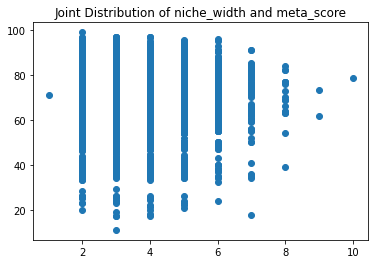

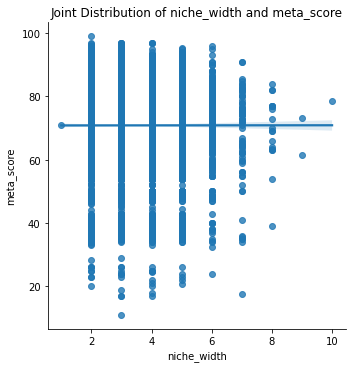

In [ ]:
#Korrelation Meta_Score:
x="niche_width"
y="meta_score"

    #Only the scatterplot:
plt.scatter(x = metacrit_data[x], y = metacrit_data[y])       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/scatterplot_"+x+"_"+y+ ".jpg")    #Saves the picture at the end


    #Scatterplot and correlation line
sns.lmplot(x, y, data=metacrit_data)                       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/correlation_"+x+"_"+y+ ".jpg")    #Saves the picture at the end

print(metacrit_data[[x,y]].dropna().corr())

c:\Users\Marek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


             niche_width  user_score
niche_width     1.000000   -0.049085
user_score     -0.049085    1.000000


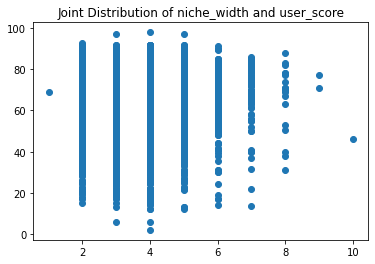

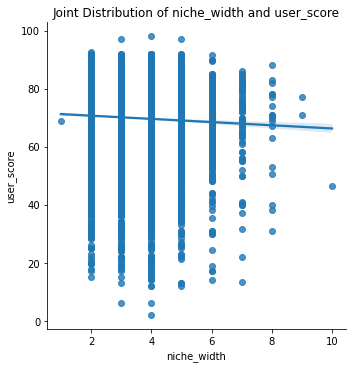

In [ ]:
#Korrelation User_Score:
x="niche_width"
y="user_score"

    #Only the scatterplot:
plt.scatter(x = metacrit_data[x], y = metacrit_data[y])       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/scatterplot_"+x+"_"+y+ ".jpg")    #Saves the picture at the end


    #Scatterplot and correlation line
sns.lmplot(x, y, data=metacrit_data)                       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/correlation_"+x+"_"+y+ ".jpg")    #Saves the picture at the end

print(metacrit_data[[x,y]].dropna().corr())

In [ ]:
metacrit_data[["meta_score","user_score","niche_width"]].to_stata('stata_data.dta')

In [ ]:
%stata use stata_data

#Korrelation
%stata corr niche_width user_score 
%stata ttest niche_width, by(user_score)



(obs=8,827)

             | niche_~h user_s~e
-------------+------------------
 niche_width |   1.0000
  user_score |  -0.0491   1.0000



Exception in thread Stata:
Traceback (most recent call last):
  File "c:\Users\Marek\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Program Files/Stata17/utilities\pystata\core\stout.py", line 169, in run
    raise SystemError(output)
SystemError: more than 2 groups found, only 2 allowed
r(420);



In [ ]:
metacrit_data

,game_name,meta_score,user_score,platform,description,developer,genre,type,rating,publisher,...,genre4,genre5,genre6,genre7,genre8,genre9,genre10,niche_width,platform_width,year
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E,Nintendo,...,0,0,0,0,0,0,0,2.0,1,1998.0
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E,Nintendo,...,0,0,0,0,0,0,0,3.0,1,2007.0
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E,Nintendo,...,0,0,0,0,0,0,0,3.0,1,2010.0
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T,Nintendo,...,Sci-Fi,0,0,0,0,0,0,4.0,1,2002.0
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+,Nintendo,...,0,0,0,0,0,0,0,3.0,1,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T,Namco,...,Modern,0,0,0,0,0,0,4.0,2,2003.0
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+,Deep Silver,...,Automobile,0,0,0,0,0,0,4.0,1,2010.0
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E,Extra Mile Studios,...,0,0,0,0,0,0,0,3.0,1,2018.0
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",THQ,"['Miscellaneous', 'General']",0,E,THQ,...,0,0,0,0,0,0,0,2.0,1,2010.0


# Hypothese 2:


In [ ]:
metacrit_data

,game_name,meta_score,user_score,platform,description,developer,genre,type,rating,publisher,...,genre4,genre5,genre6,genre7,genre8,genre9,genre10,niche_width,platform_width,year
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E,Nintendo,...,0,0,0,0,0,0,0,2.0,1,1998.0
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E,Nintendo,...,0,0,0,0,0,0,0,3.0,1,2007.0
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E,Nintendo,...,0,0,0,0,0,0,0,3.0,1,2010.0
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T,Nintendo,...,Sci-Fi,0,0,0,0,0,0,4.0,1,2002.0
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+,Nintendo,...,0,0,0,0,0,0,0,3.0,1,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T,Namco,...,Modern,0,0,0,0,0,0,4.0,2,2003.0
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+,Deep Silver,...,Automobile,0,0,0,0,0,0,4.0,1,2010.0
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E,Extra Mile Studios,...,0,0,0,0,0,0,0,3.0,1,2018.0
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",THQ,"['Miscellaneous', 'General']",0,E,THQ,...,0,0,0,0,0,0,0,2.0,1,2010.0


In [ ]:
# Setze die 0 in den genre Spalten als Fehlenden Wert
x=1
while x<11:
    print(("genre"+str(x))+ " vorher: " + str(metacrit_data[("genre"+str(x))].count()))
    metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].replace(0, np.nan)
    print(("genre"+str(x))+ " nachher: " + str(metacrit_data[("genre"+str(x))].count()))
    x=x+1

genre1 vorher: 8831
genre1 nachher: 8827
genre2 vorher: 8831
genre2 nachher: 8826
genre3 vorher: 8831
genre3 nachher: 6441
genre4 vorher: 8831
genre4 nachher: 3579
genre5 vorher: 8831
genre5 nachher: 1606
genre6 vorher: 8831
genre6 nachher: 339
genre7 vorher: 8831
genre7 nachher: 96
genre8 vorher: 8831
genre8 nachher: 22
genre9 vorher: 8831
genre9 nachher: 3
genre10 vorher: 8831
genre10 nachher: 1


In [ ]:
#Erstellt von jeder genre Spalte eine Liste mit den einzigartigen Genres der jeweiligen Spalte
genre1_list=metacrit_data["genre1"].unique().tolist()
genre2_list=metacrit_data["genre2"].unique().tolist()
genre3_list=metacrit_data["genre3"].unique().tolist()
genre4_list=metacrit_data["genre4"].unique().tolist()
genre5_list=metacrit_data["genre5"].unique().tolist()
genre6_list=metacrit_data["genre6"].unique().tolist()
genre7_list=metacrit_data["genre7"].unique().tolist()
genre8_list=metacrit_data["genre8"].unique().tolist()
genre9_list=metacrit_data["genre9"].unique().tolist()
genre10_list=metacrit_data["genre10"].unique().tolist()

In [ ]:
#Erstellt aus den einzelnen Listen eine einzige Liste, bei der jedes einzigartige Genre nur einmal aufgelistet wird.
list_of_unique_genres=sorted(np.unique(genre1_list+genre2_list+genre3_list+genre4_list+genre5_list+genre6_list+genre7_list+genre8_list+genre9_list+genre10_list))
list_of_unique_genres.remove("nan")
list_of_unique_genres

['"Beat-Em-Up"',
 '"Shoot-Em-Up"',
 '2D',
 '3D',
 '4X',
 'Action',
 'ActionAdventure',
 'ActionRPG',
 'Adventure',
 'Alternative',
 'Application',
 'Arcade',
 'Artillery',
 'Athletics',
 'Automobile',
 'Baseball',
 'Basketball',
 'Biking',
 'Billiards',
 'Board/CardGame',
 'BoardGames',
 'Bowling',
 'Boxing',
 'Boxing/MartialArts',
 'Breeding/Constructing',
 'Business/Tycoon',
 'CarCombat',
 'CardBattle',
 'Career',
 'CityBuilding',
 'Civilian',
 'CivilianPlane',
 'Combat',
 'Command',
 'Compilation',
 'Console-styleRPG',
 'Cricket',
 'Dancing',
 'Defense',
 'DemolitionDerby',
 'Drag',
 'Driving',
 'Edutainment',
 'Exercise/Fitness',
 'Fantasy',
 'Fighting',
 'First-Person',
 'Fishing',
 'Flight',
 'Football',
 'FormulaOne',
 'Futuristic',
 'FuturisticJet',
 'FuturisticSub',
 'GT/Street',
 'Gambling',
 'General',
 'Golf',
 'Government',
 'Helicopter',
 'HiddenObject',
 'Historic',
 'Horizontal',
 'Horror',
 'HorseRacing',
 'Hunting',
 'IceHockey',
 'Individual',
 'InteractiveMovie',
 '

In [ ]:
#Gibt die Länge der Genre Liste wieder
len(list_of_unique_genres)

168

In [ ]:
#Gibt die Position des eigegebenen Genres ("Tank") wieder
list_of_unique_genres.index("Tank")

142

In [ ]:
#Gibt das Genre an der eingegebenen Position (142) wieder
list_of_unique_genres[142]

'Tank'

In [ ]:
#Erstellt 2 leere DataFrames, welche mit Werten "befüllt" werden können
data = {'genre': [],
        'mean': [],
        'median': []}

genre_meta_df = pd.DataFrame(data)
genre_user_df = pd.DataFrame(data)

In [ ]:
#Überträgt das Arithmetische Mittel und den Median des MetaScores je Genre (über 30 Fälle) in einen gesonderten DataFrame
x=1
while x<168:
    temp_df=metacrit_data[(metacrit_data["genre1"]==list_of_unique_genres[x]) | (metacrit_data["genre2"]==list_of_unique_genres[x]) | (metacrit_data["genre3"]==list_of_unique_genres[x]) | (metacrit_data["genre4"]==list_of_unique_genres[x]) | (metacrit_data["genre5"]==list_of_unique_genres[x]) | (metacrit_data["genre6"]==list_of_unique_genres[x]) | (metacrit_data["genre7"]==list_of_unique_genres[x]) | (metacrit_data["genre8"]==list_of_unique_genres[x]) | (metacrit_data["genre9"]==list_of_unique_genres[x]) | (metacrit_data["genre10"]==list_of_unique_genres[1])]
    if len(temp_df)>30:
        genre_meta_df.loc[x,["genre", "mean", "median"]] = [list_of_unique_genres[x], (temp_df["meta_score"].mean()),(temp_df["meta_score"].median()) ]
        #print("Median für Genre " +str(list_of_unique_genres[x]) + ": " + str(temp_df["meta_score"].median()) )
        #print("Arithmetisches Mittel für Genre " +str(list_of_unique_genres[x]) + ": " + str(temp_df["meta_score"].mean()) )
    x=x+1

In [ ]:
#Überträgt das Arithmetische Mittel und den Median des UserScores je Genre (über 30 Fälle) in einen gesonderten DataFrame
x=1
while x<168:
    temp_df=metacrit_data[(metacrit_data["genre1"]==list_of_unique_genres[x]) | (metacrit_data["genre2"]==list_of_unique_genres[x]) | (metacrit_data["genre3"]==list_of_unique_genres[x]) | (metacrit_data["genre4"]==list_of_unique_genres[x]) | (metacrit_data["genre5"]==list_of_unique_genres[x]) | (metacrit_data["genre6"]==list_of_unique_genres[x]) | (metacrit_data["genre7"]==list_of_unique_genres[x]) | (metacrit_data["genre8"]==list_of_unique_genres[x]) | (metacrit_data["genre9"]==list_of_unique_genres[x]) | (metacrit_data["genre10"]==list_of_unique_genres[1])]
    if len(temp_df)>30:
        genre_user_df.loc[x,["genre", "mean", "median"]] = [list_of_unique_genres[x], (temp_df["user_score"].mean()),(temp_df["user_score"].median()) ]
        #print("Median für Genre " +str(list_of_unique_genres[x]) + ": " + str(temp_df["user_score"].median()) )
        #print("Arithmetisches Mittel für Genre " +str(list_of_unique_genres[x]) + ": " + str(temp_df["user_score"].mean()) )
    x=x+1

In [ ]:
genre_meta_df.to_clipboard()

In [ ]:
genre_meta_df.sort_values("mean")

,genre,mean,median
98,Party,58.270000,59.000
99,Party/Minigame,62.956250,63.000
95,Other,64.588400,64.335
84,Mission-based,64.742857,64.000
154,Tycoon,65.011364,64.500
...,...,...,...
128,Soccer,75.684554,78.500
49,Football,76.307403,78.000
118,Sim,76.469412,79.000
66,IceHockey,76.474000,79.000


In [ ]:
genre_meta_df.sort_values("median")

,genre,mean,median
98,Party,58.270000,59.000
99,Party/Minigame,62.956250,63.000
84,Mission-based,64.742857,64.000
95,Other,64.588400,64.335
154,Tycoon,65.011364,64.500
...,...,...,...
15,Baseball,75.666515,78.000
128,Soccer,75.684554,78.500
66,IceHockey,76.474000,79.000
118,Sim,76.469412,79.000


In [ ]:
genre_user_df

,genre,mean,median
1,"""Shoot-Em-Up""",69.948077,72.0
2,2D,71.209015,73.0
3,3D,70.176657,72.0
4,4X,73.138095,77.0
5,Action,69.572160,72.0
...,...,...,...
158,Virtual,66.085841,70.0
159,VirtualLife,66.102410,71.0
160,VisualNovel,72.194118,75.0
166,Western-Style,71.853390,75.0


In [ ]:
genre_user_df.sort_values("mean")

,genre,mean,median
143,Team,62.000897,68.00
98,Party,63.240000,67.50
99,Party/Minigame,63.856250,66.50
155,Vehicle,64.394444,67.75
67,Individual,64.419459,67.00
...,...,...,...
69,Japanese-Style,73.446448,75.00
33,Command,74.022222,75.00
132,Static,74.677419,77.00
34,Compilation,74.679808,77.00


In [ ]:
genre_user_df.sort_values("median")

,genre,mean,median
66,IceHockey,65.182222,66.50
99,Party/Minigame,63.856250,66.50
67,Individual,64.419459,67.00
98,Party,63.240000,67.50
155,Vehicle,64.394444,67.75
...,...,...,...
34,Compilation,74.679808,77.00
4,4X,73.138095,77.00
132,Static,74.677419,77.00
63,Horror,73.255000,77.50


# Hypothese 3:

c:\Users\Marek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                platform_width  meta_score
platform_width        1.000000    0.111204
meta_score            0.111204    1.000000


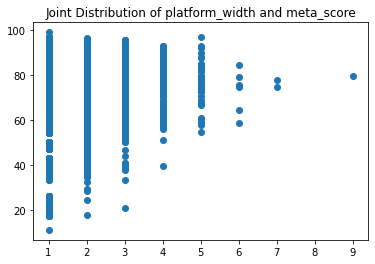

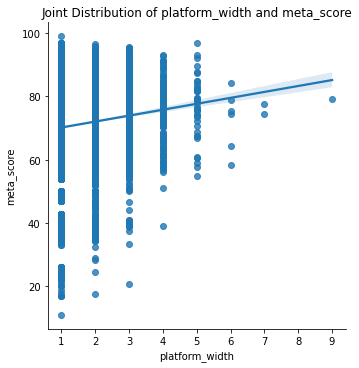

In [ ]:
#Korrelation Meta_Score:
x="platform_width"
y="meta_score"

    #Only the scatterplot:
plt.scatter(x = metacrit_data[x], y = metacrit_data[y])       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/scatterplot_"+x+"_"+y+ ".jpg")    #Saves the picture at the end


    #Scatterplot and correlation line
sns.lmplot(x, y, data=metacrit_data)                       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/correlation_"+x+"_"+y+ ".jpg")    #Saves the picture at the end

print(metacrit_data[[x,y]].dropna().corr())

In [ ]:
#Positive Korrelation, lässt sich damit erklären, das Tester das Spiel auf der "besten" Platform testen können. Somit wird eine bug-freie Version getestet. 

c:\Users\Marek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                platform_width  user_score
platform_width        1.000000    0.000778
user_score            0.000778    1.000000


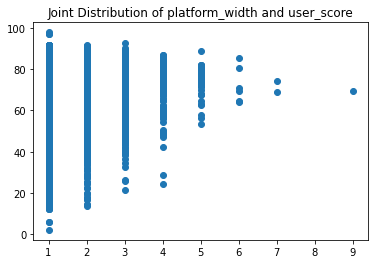

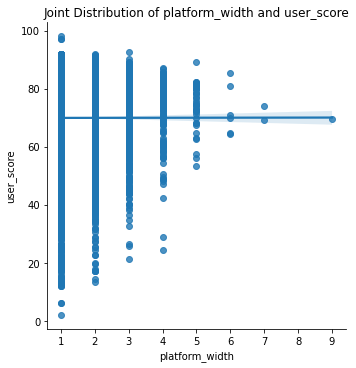

In [ ]:
#Korrelation User_Score:
x="platform_width"
y="user_score"

    #Only the scatterplot:
plt.scatter(x = metacrit_data[x], y = metacrit_data[y])       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/scatterplot_"+x+"_"+y+ ".jpg")    #Saves the picture at the end


    #Scatterplot and correlation line
sns.lmplot(x, y, data=metacrit_data)                       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/correlation_"+x+"_"+y+ ".jpg")    #Saves the picture at the end

print(metacrit_data[[x,y]].dropna().corr())

# Hypothese 4:

In [ ]:
counted = metacrit_data.groupby(["developer"]).size().reset_index(name='counts')
groupdev= metacrit_data[metacrit_data["developer"].isin(counted[counted.counts > 30].developer)]

In [ ]:
groupdev.groupby(["developer"])["meta_score"].median().sort_values()

developer
From Software             68.000
Omega Force               69.000
Ubisoft                   70.000
Konami                    70.000
Vicarious Visions         71.000
Level 5                   74.000
Nippon Ichi Software      74.000
Namco                     74.500
Electronic Arts           75.000
Bandai Namco Games        75.500
Arc System Works          75.750
Ubisoft Montreal          75.835
Sega                      76.000
Square Enix               76.000
Telltale Games            76.000
Maxis                     76.500
Capcom                    77.000
EA Canada                 77.500
EA Tiburon                79.000
EA Sports                 80.000
Nintendo                  81.000
Codemasters               81.335
Visual Concepts           83.000
Blizzard Entertainment    87.000
Name: meta_score, dtype: float64

In [ ]:
groupdev.groupby(["developer"])["meta_score"].mean().sort_values()

developer
Ubisoft                   67.122000
Omega Force               67.271373
Konami                    68.616163
Bandai Namco Games        68.765952
From Software             69.276774
Vicarious Visions         70.516129
Nippon Ichi Software      72.388889
Arc System Works          73.171053
Square Enix               73.355263
Sega                      73.587719
Ubisoft Montreal          74.107097
Capcom                    74.198400
Namco                     74.403421
Level 5                   74.642857
Electronic Arts           74.820222
Telltale Games            76.024038
EA Canada                 76.088500
Maxis                     76.416765
EA Tiburon                77.412000
EA Sports                 78.887273
Codemasters               79.300556
Nintendo                  79.580769
Visual Concepts           79.588485
Blizzard Entertainment    85.215161
Name: meta_score, dtype: float64

# Hypothese 5:

c:\Users\Marek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                year  meta_score
year        1.000000    0.007442
meta_score  0.007442    1.000000


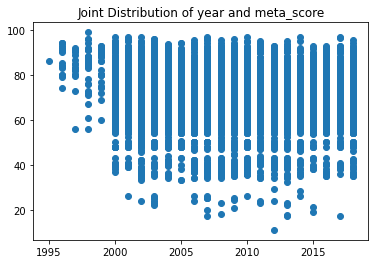

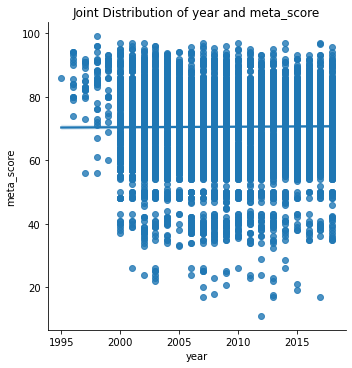

In [ ]:
#Korrelation Meta_Score:
x="year"
y="meta_score"

    #Only the scatterplot:
plt.scatter(x = metacrit_data[x], y = metacrit_data[y])       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/scatterplot_"+x+"_"+y+ ".jpg")    #Saves the picture at the end


    #Scatterplot and correlation line
sns.lmplot(x, y, data=metacrit_data)                       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/correlation_"+x+"_"+y+ ".jpg")    #Saves the picture at the end

print(metacrit_data[[x,y]].dropna().corr())

c:\Users\Marek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                year  user_score
year        1.000000   -0.215807
user_score -0.215807    1.000000


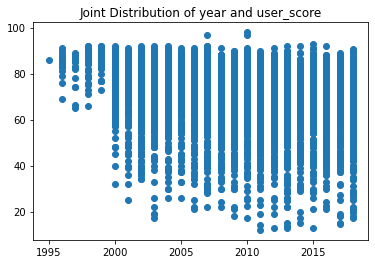

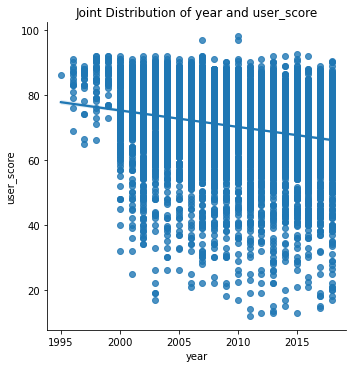

In [ ]:
#Korrelation User_Score:
x="year"
y="user_score"

    #Only the scatterplot:
plt.scatter(x = metacrit_data[x], y = metacrit_data[y])       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/scatterplot_"+x+"_"+y+ ".jpg")    #Saves the picture at the end


    #Scatterplot and correlation line
sns.lmplot(x, y, data=metacrit_data)                       #The needed Variables are set as dependent and independent:
plt.title("Joint Distribution of "+x+  " and "+y )      #The Titel of the visual
plt.savefig("Pictures/correlation_"+x+"_"+y+ ".jpg")    #Saves the picture at the end

print(metacrit_data[[x,y]].dropna().corr())

# "Test Area"

In [69]:
metacrit_data["niche_width"]=metacrit_data["niche_width"].replace(0,np.nan)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8831 entries, 0 to 8830
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_name       8831 non-null   object 
 1   meta_score      8831 non-null   float64
 2   user_score      8831 non-null   float64
 3   platform        8831 non-null   object 
 4   developer       8831 non-null   object 
 5   genre           8831 non-null   object 
 6   publisher       7498 non-null   object 
 7   release_date    7500 non-null   object 
 8   genre1          8827 non-null   object 
 9   genre2          8826 non-null   object 
 10  genre3          6441 non-null   object 
 11  genre4          3579 non-null   object 
 12  genre5          1606 non-null   object 
 13  genre6          339 non-null    object 
 14  genre7          96 non-null     object 
 15  genre8          22 non-null     object 
 16  genre9          3 non-null      object 
 17  genre10         1 non-null      o

In [ ]:
metacrit_data

,game_name,meta_score,user_score,platform,description,developer,genre,type,rating,publisher,...,genre4,genre5,genre6,genre7,genre8,genre9,genre10,niche_width,platform_width,year
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E,Nintendo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,1998.0
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E,Nintendo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1,2007.0
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E,Nintendo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1,2010.0
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T,Nintendo,...,Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1,2002.0
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+,Nintendo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,kill.switch,74.0,80.5,"['xbox', 'playstation-2']","In a world on the brink of global conflict, yo...",Namco,"['Action', 'Shooter', 'Third-Person', 'Modern']",singleplayer,T,Namco,...,Modern,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2,2003.0
8827,nail'd,69.0,76.0,['pc'],nail’d is all about eschewing boring realism f...,Techland,"['Driving', 'Racing', 'Arcade', 'Automobile']",singleplayer,E10+,Deep Silver,...,Automobile,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1,2010.0
8828,oOo: Ascension,70.0,73.0,['xbox-one'],oOo: Ascension is a lightning-paced test of re...,Kenny Creanor,"['Action', 'General', 'Arcade']",multiplayer,E,Extra Mile Studios,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1,2018.0
8829,uDraw Studio,71.0,71.0,['wii'],"Packaged with the uDraw GameTablet, uDraw Stud...",THQ,"['Miscellaneous', 'General']",0,E,THQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,2010.0


In [ ]:
#
metacrit_data["meta_score"].equals(metacrit_data["metascore"])

KeyError: 'metascore'

In [ ]:
metacrit_data["meta_score"].median()

73.0

In [ ]:
metacrit_data.sort_values(by="meta_score", ascending=False)

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating,...,genre4,genre5,genre6,genre7,genre8,genre9,genre10,niche_width,platform_width,year
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",/game/nintendo-64/the-legend-of-zelda-ocarina-...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1998.0
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",/game/wii/super-mario-galaxy-2,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2010.0
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,/game/gamecube/metroid-prime,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T,...,Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,4,1,2002.0
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,/game/switch/super-mario-odyssey,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2017.0
5,Halo: Combat Evolved,97.0,87.0,['xbox'],"Enter the mysterious world of Halo, an alien p...",/game/xbox/halo-combat-evolved,Bungie Software,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",multiplayer,M,...,Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,4,1,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7306,Ride to Hell: Retribution,17.5,13.5,"['xbox-360', 'pc']",The game is set in the last years of the roari...,/game/xbox-360/ride-to-hell-retribution,Eutechnyx,"['Driving', 'Action Adventure', 'Modern', 'Rac...",singleplayer,M,...,Racing,General,Motorcycle,Motocross,NaN,NaN,NaN,7,2,2013.0
4257,Yaris,17.0,44.0,['xbox-360'],[Xbox Live Arcade] Hop into a Toyota Yaris an...,/game/xbox-360/yaris,Backbone Entertainment,"['Driving', 'Racing', 'Arcade', 'Automobile']",multiplayer,E10+,...,Automobile,NaN,NaN,NaN,NaN,NaN,NaN,4,1,2007.0
4256,Vroom in the Night Sky,17.0,32.0,['switch'],Vroom in the night sky is a magical bike actio...,/game/switch/vroom-in-the-night-sky,Poisoft,"['Sports', 'Individual', 'Biking']",singleplayer,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2017.0
4255,Double Dragon II: Wander of the Dragons,17.0,15.0,['xbox-360'],A remake the 80's Double Dragon II game. Team ...,/game/xbox-360/double-dragon-ii-wander-of-the-...,Gravity Corporation,"['Action', ""Beat-'Em-Up"", '2D']",0,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2013.0


In [ ]:
# Setze die 0 in den genre Spalten als Fehlenden Wert
x=1
while x<11:
    print(("genre"+str(x))+ " vorher: " + str(metacrit_data[("genre"+str(x))].count()))
    metacrit_data[("genre"+str(x))]=metacrit_data[("genre"+str(x))].replace(0, np.nan)
    print(("genre"+str(x))+ " nachher: " + str(metacrit_data[("genre"+str(x))].count()))
    x=x+1

genre1 vorher: 8827
genre1 nachher: 8827
genre2 vorher: 8826
genre2 nachher: 8826
genre3 vorher: 6441
genre3 nachher: 6441
genre4 vorher: 3579
genre4 nachher: 3579
genre5 vorher: 1606
genre5 nachher: 1606
genre6 vorher: 339
genre6 nachher: 339
genre7 vorher: 96
genre7 nachher: 96
genre8 vorher: 22
genre8 nachher: 22
genre9 vorher: 3
genre9 nachher: 3
genre10 vorher: 1
genre10 nachher: 1


In [ ]:
metacrit_data.groupby(["genre1","genre2","genre3","genre4","genre5","genre6","genre7","genre8","genre9","genre10"])["meta_score"].mean()

genre1        genre2  genre3  genre4      genre5   genre6   genre7        genre8  genre9    genre10 
First-Person  Modern  Action  Simulation  Shooter  Vehicle  Third-Person  Combat  Tactical  Historic    78.67
Name: meta_score, dtype: float64

In [ ]:
metacrit_data.groupby(["genre2","genre3"])["meta_score"].mean()

genre2         genre3      
"Beat-Em-Up"   2D              61.860714
               3D              66.778852
               Fighting        62.000000
"Shoot-Em-Up"  Horizontal      73.000000
2D             Action          74.214286
                                 ...    
Virtual        Career          67.523571
               VirtualLife     73.901765
VirtualLife    Strategy        64.000000
Wargame        Turn-Based      71.000000
Western-Style  Role-Playing    42.000000
Name: meta_score, Length: 458, dtype: float64

In [ ]:
metacrit_data.groupby(["genre"])["meta_score"].value_counts()

genre                                                                    meta_score
0                                                                        63.0          1
                                                                         71.0          1
                                                                         80.0          1
                                                                         81.0          1
["Beat-'Em-Up", 'Action', 'Fighting', '2D']                              62.5          1
                                                                                      ..
['Turn-Based', 'Action', 'General']                                      81.0          1
['Tycoon', 'Business / Tycoon', 'Strategy', 'Management', 'Government']  75.5          1
['Tycoon', 'Strategy', 'Management', 'Business / Tycoon']                43.0          1
                                                                         68.0          1
['WWI', 'Simulation', 'Fli

In [ ]:
groupeddev = metacrit_data.groupby(['developer']).filter(lambda x: x['developer'].nunique() > 10)

In [ ]:
groupeddev["meta_score"].mean()

nan

In [ ]:
groupeddev=metacrit_data.groupby("developer").filter(lambda grp: grp.developer.nunique() > 1)

In [ ]:
group=metacrit_data.groupby(["developer"])

In [ ]:
group["meta_score"].mean().sort_values()

developer
Art Co., Ltd.              11.00
Gravity Corporation        17.00
Pure FPS                   19.00
Hammerpoint Interactive    20.00
Versus Evil                21.00
                           ...  
tobyfox                    92.33
MPS Labs                   94.00
NexTech                    94.00
Monstars Inc.              95.00
HuneX                      97.00
Name: meta_score, Length: 2928, dtype: float64

In [ ]:
counted = metacrit_data.groupby(["developer"]).size().reset_index(name='counts')
groupdev=metacrit_data[metacrit_data["developer"].isin(counted[counted.counts > 30].developer)]

In [ ]:
groupdev.groupby(["developer"])["meta_score"].median().sort_values()

developer
From Software             68.000
Omega Force               69.000
Ubisoft                   70.000
Konami                    70.000
Vicarious Visions         71.000
Level 5                   74.000
Nippon Ichi Software      74.000
Namco                     74.500
Electronic Arts           75.000
Bandai Namco Games        75.500
Arc System Works          75.750
Ubisoft Montreal          75.835
Sega                      76.000
Square Enix               76.000
Telltale Games            76.000
Maxis                     76.500
Capcom                    77.000
EA Canada                 77.500
EA Tiburon                79.000
EA Sports                 80.000
Nintendo                  81.000
Codemasters               81.335
Visual Concepts           83.000
Blizzard Entertainment    87.000
Name: meta_score, dtype: float64

In [ ]:
groupdev.groupby(["developer"])["meta_score"].mean().sort_values()

developer
Ubisoft                   67.122000
Omega Force               67.271373
Konami                    68.616163
Bandai Namco Games        68.765952
From Software             69.276774
Vicarious Visions         70.516129
Nippon Ichi Software      72.388889
Arc System Works          73.171053
Square Enix               73.355263
Sega                      73.587719
Ubisoft Montreal          74.107097
Capcom                    74.198400
Namco                     74.403421
Level 5                   74.642857
Electronic Arts           74.820222
Telltale Games            76.024038
EA Canada                 76.088500
Maxis                     76.416765
EA Tiburon                77.412000
EA Sports                 78.887273
Codemasters               79.300556
Nintendo                  79.580769
Visual Concepts           79.588485
Blizzard Entertainment    85.215161
Name: meta_score, dtype: float64

In [ ]:
group_dev["meta_score"].mean().sort_values()

NameError: name 'group_dev' is not defined

In [ ]:
#dev_list=
metacrit_data["developer"].value_counts()



In [ ]:
dev_list=dev_list.replace(False, np.nan)
dev_list=dev_list.dropna()

In [ ]:
devlist=pd.DataFrame(dev_list)
devlist

In [ ]:
metacrit_data["developer"].unique()

In [ ]:
#Gibt die Index-ID des Spieles an, welches die meisten Zeichen in der "Genre"-Spalte besitzt
s=metacrit_data["genre"].str.len().idxmax()
print(s)
#Zeigt die Genre-Spalte des entsprechenden Spieles and
print(metacrit_data.loc[s, "genre"])
#Gibt an wie viele einzelne Genres in der Spalte vertreten sind
print(len(metacrit_data.loc[8716, "genre"].split(",")))

In [ ]:
releasedata.groupby("name").count()

,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
name,,,,,,,,,,,,,,,,,
#IDARB,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1
#KILLALLZOMBIES,2,2,2,2,0,2,0,2,2,2,2,2,2,2,2,2,2
'Splosion Man,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
'n Verlore Verstand,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
.detuned,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
theHunter: Call of the Wild,3,3,3,3,2,3,0,3,3,3,3,3,3,3,3,3,3
uDraw Studio,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1
uDraw Studio: Instant Artist,2,2,2,2,0,2,0,2,2,2,2,2,2,2,2,2,2


In [ ]:
filt=metacrit_data['game_name'].str.contains("[0-9]")==True
metacrit_data[filt]

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating,...,genre4,genre5,genre6,genre7,genre8,genre9,genre10,niche_width,platform_width,year
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",/game/wii/super-mario-galaxy-2,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1,2010.0
7,NFL 2K1,97.0,62.0,['dreamcast'],"In the end, NFL 2K1 is a deeper, more refined ...",/game/dreamcast/nfl-2k1,Visual Concepts,"['Sports', 'Traditional', 'Football', 'Sim']",0,E,...,Sim,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1,2000.0
8,Uncharted 2: Among Thieves,96.0,88.0,['playstation-3'],Fortune hunter Nathan Drake returns in Unchart...,/game/playstation-3/uncharted-2-among-thieves,Naughty Dog,"['Action Adventure', 'Modern', 'Linear']",singleplayer,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1,2009.0
9,Tekken 3,96.0,91.0,['playstation'],"An ancient evil force has reawakened, attackin...",/game/playstation/tekken-3,Namco,"['Action', 'Fighting', '3D']",multiplayer,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1,1998.0
12,Metal Gear Solid 2: Sons of Liberty,96.0,88.0,['playstation-2'],"Since the incident on Shadow Moses Island, Met...",/game/playstation-2/metal-gear-solid-2-sons-of...,KCEJ,"['Action Adventure', 'Modern']",singleplayer,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1,2001.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8799,ZEN Pinball 2: The Walking Dead,83.0,60.0,['playstation-4'],The Walking Dead Pinball table playfield is a ...,/game/playstation-4/zen-pinball-2-the-walking-...,Zen Studios,"['Action', 'Miscellaneous', 'Parlor', 'Pinball']",0,E10+,...,Pinball,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1,2014.0
8814,Zoo Tycoon 2: Endangered Species,64.0,76.0,['pc'],Endangered Species brings some of the world's ...,/game/pc/zoo-tycoon-2-endangered-species,Blue Fang Games,"['Strategy', 'Tycoon', 'Management', 'Business...",0,E10+,...,Business/Tycoon,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1,2005.0
8820,de Blob 2,74.0,72.2,"['xbox-360', 'xbox-one', 'ds', 'playstation-3'...",In de Blob 2 Comrade Black and the Inkies are ...,/game/xbox-360/de-blob-2,Blue Tongue Entertainment,"['Action', 'Adventure', 'General', 'Platformer...",0,E10+,...,Platformer,3D,NaN,NaN,NaN,NaN,NaN,5.0,5,2011.0
8821,eFootball PES 2020,82.0,73.0,"['xbox-one', 'playstation-4']",Experience realism and authenticity in this ye...,/game/xbox-one/efootball-pes-2020,Konami,"['Sports', 'Team', 'Soccer', 'Sim']",multiplayer,E,...,Sim,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2,NaN
